In [25]:
import Function as F
import DefineFiles as D
import importlib
importlib.reload(F)  # 변경 사항 반영
importlib.reload(D)  # 변경 사항 반영
from Function import *
from DefineFiles import *


In [3]:
data = np.load("velocity_data_1000_512_1_512.npy")

np.shape(data)

(1000, 512, 1, 512, 3)

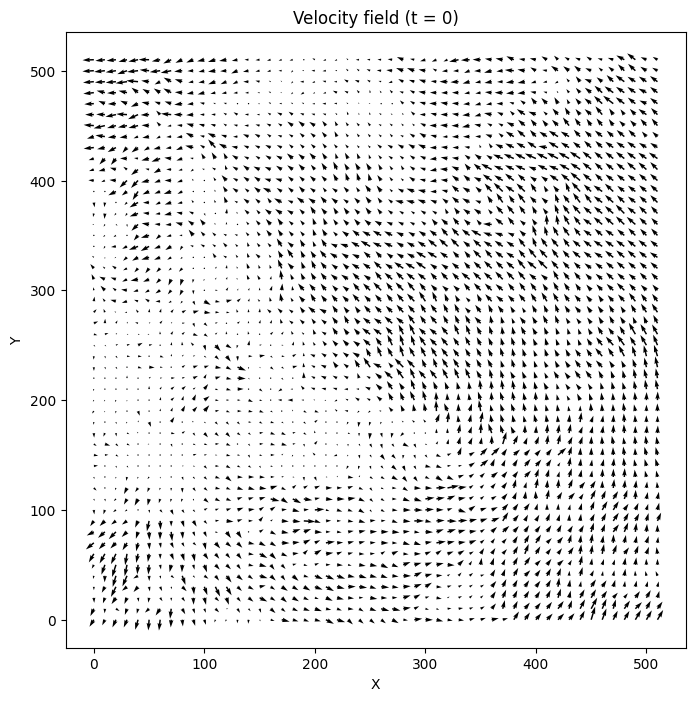

In [11]:
t_index = 0
velocity_field = data[t_index, :, 0, :, :]  # (512, 512, 3)

X, Y = np.meshgrid(np.arange(512), np.arange(512))

Ux = velocity_field[:, :, 0]
Uy = velocity_field[:, :, 1]

plt.figure(figsize=(8, 8))
plt.quiver(X[::10, ::10], Y[::10, ::10], Ux[::10, ::10], Uy[::10, ::10])
plt.title("Velocity field (t = 0)")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [12]:
ux_uy = data[:, :, 0, :, :2]  # (1000, 512, 512, 2)
print(ux_uy.shape)  # (1000, 512, 512, 2)

(1000, 512, 512, 2)


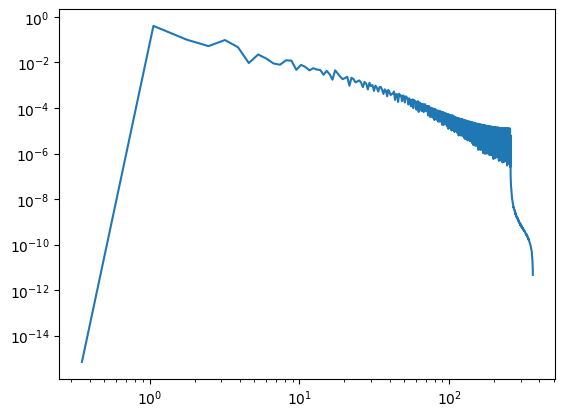

In [ ]:
def ek(u, v, n_bins):
    """에너지 스펙트럼 계산 함수"""
    Ny, Nx = u.shape
    Lx = 6.283
    Ly = 6.283
    
    dx = Lx / Nx
    dy = Ly / Ny

    u_prime = u - np.mean(u)
    v_prime = v - np.mean(v)

    U_hat = np.fft.fft2(u_prime)
    V_hat = np.fft.fft2(v_prime)

    PS = (np.abs(U_hat)**2 + np.abs(V_hat)**2) / (Nx * Ny)**2
    
    kx = 2.0 * np.pi * np.fft.fftfreq(Nx, d=dx)
    ky = 2.0 * np.pi * np.fft.fftfreq(Ny, d=dy)
    
    KX, KY = np.meshgrid(kx, ky)
    
    K_mag = np.sqrt(KX**2 + KY**2)
    
    k_max = K_mag.max()
    
    bins = np.linspace(0, k_max, n_bins+1)
    
    E_k = np.zeros(n_bins)
    k_vals = np.zeros(n_bins)
    
    for i in range(n_bins):
        k_min = bins[i]
        k_max_ = bins[i+1]
        
        mask = (K_mag >= k_min) & (K_mag < k_max_)
        
        shell_sum = np.sum(PS[mask])
        
        k_mid = 0.5 * (k_min + k_max_)
        
        E_k[i] = shell_sum
        k_vals[i] = k_mid

    return k_vals, E_k

# # 모든 타임스텝 평균 에너지 스펙트럼 계산
# def average_energy_spectrum(data, n_bins=50):
#     """전체 타임스텝에서 평균 에너지 스펙트럼 계산"""
#     n_time_steps = data.shape[0]  # 전체 시간 스텝 개수
#     E_k_avg = np.zeros(n_bins)

#     for t in range(n_time_steps):
ux = data[t, :, 0, :, 0]  # ux (512, 512)
uy = data[t, :, 0, :, 1]  # uy (512, 512)

    #     k_vals, E_k = ek(ux, uy, n_bins)
    #     E_k_avg += E_k

    # E_k_avg /= n_time_steps  # 평균화

    # return k_vals, E_k_avg

# 실행 예시
plt.figure()
k_vals, E_k_avg = ek(ux, uy, n_bins=512)
plt.loglog(k_vals, E_k_avg)
plt.show()

In [109]:
def ek(u, v, n_bins):
    Ny, Nx = 512, 512
    Lx = 2*np.pi
    Ly = 2*np.pi
    
    dx = Lx / Nx
    dy = Ly / Ny

    u_prime = u - np.mean(u)
    v_prime = v - np.mean(v)

    U_hat = np.fft.fft2(u_prime)
    V_hat = np.fft.fft2(v_prime)

    PS = (np.abs(U_hat)**2 + np.abs(V_hat)**2) / (Nx * Ny) **2
    
    kx = 2.0 * np.pi * np.fft.fftfreq(Nx, d=dx)
    ky = 2.0 * np.pi * np.fft.fftfreq(Ny, d=dy)
    
    KX, KY = np.meshgrid(kx, ky)
    
    K_mag = np.sqrt(KX**2 + KY**2)
    
    k_max = K_mag.max()
    
    bins = np.linspace(0, k_max, n_bins+1)
    
    E_k = np.zeros(n_bins)
    k_vals = np.zeros(n_bins)
    
    for i in range(n_bins):
        k_min = bins[i]
        k_max_ = bins[i+1]
        
        mask = (K_mag >= k_min) & (K_mag < k_max_)
        
        shell_sum = np.sum(PS[mask])
        
        k_mid = 0.5 * (k_min + k_max_)
        
        E_k[i] = shell_sum
        k_vals[i] = k_mid

    return k_vals, E_k



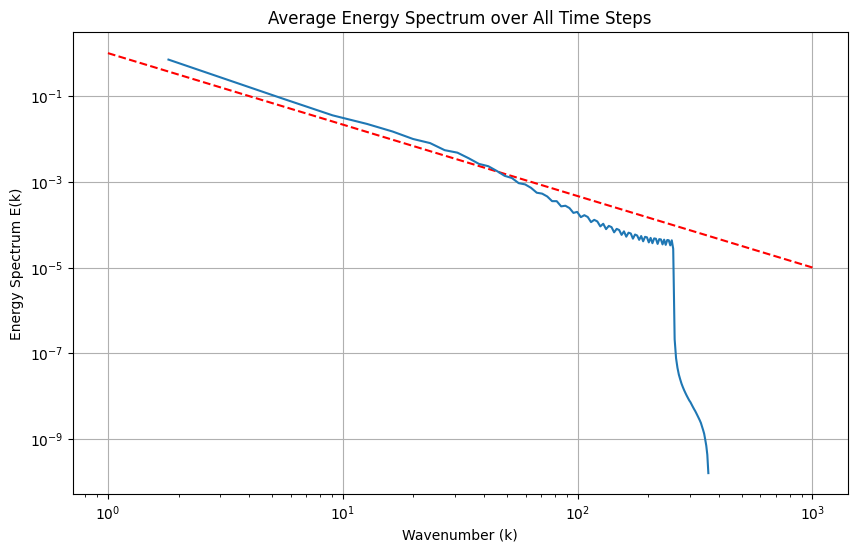

In [14]:
k_a = np.logspace(0, 3, 500)
E_k_a = ((k_a)**-(5/3)) * 10e-1
plt.figure(figsize=(10, 6))
plt.loglog(k_a, E_k_a, linestyle='--', color='red', label="E(k) = k^-5/3")
plt.loglog(k_vals, E_k_avg)
plt.xlabel("Wavenumber (k)")
plt.ylabel("Energy Spectrum E(k)")
plt.title("Average Energy Spectrum over All Time Steps")
plt.grid()
plt.show()

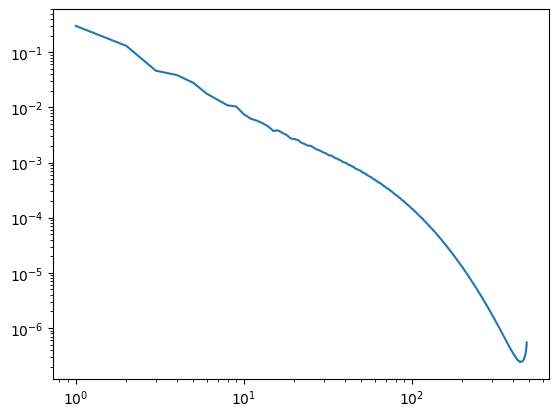

In [21]:
data2 = np.loadtxt("spectrum.txt", skiprows=2)

k_vals2 = data2[:, 0]
E_k_vals2 = data2[:, 1]

plt.loglog(k_vals2, E_k_vals2)

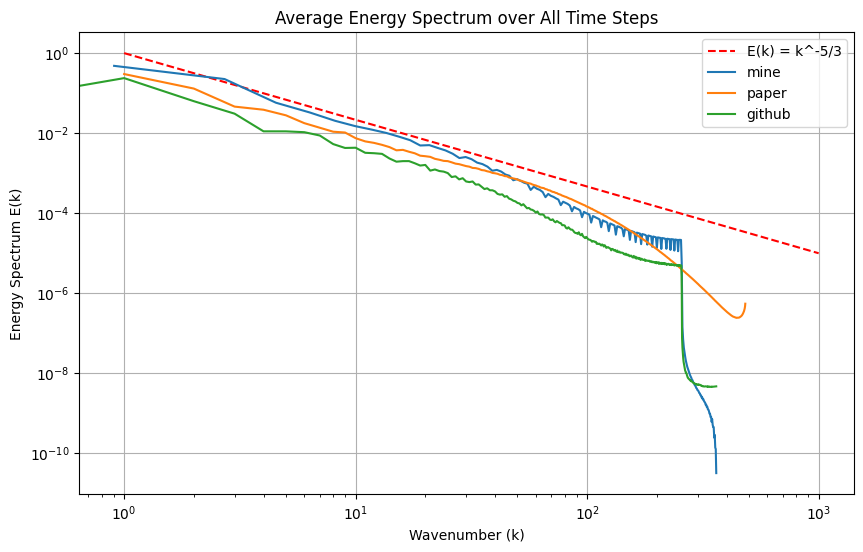

In [57]:
k_a = np.logspace(0, 3, 500)
E_k_a = ((k_a)**-(5/3)) * 10e-1
plt.figure(figsize=(10, 6))
plt.loglog(k_a, E_k_a, linestyle='--', color='red', label="E(k) = k^-5/3")
plt.loglog(k_vals, E_k_avg, label='mine')
plt.loglog(k_vals2, E_k_vals2, label='paper')
plt.loglog(en, label='github')
plt.xlabel("Wavenumber (k)")
plt.ylabel("Energy Spectrum E(k)")
plt.title("Average Energy Spectrum over All Time Steps")
plt.grid()
plt.legend()
plt.show()

In [32]:
import numpy as np
import pyfftw

def energy_spectrum_from_velocity(nx, ny, dx, u, v):
    """
    Computes the 2D isotropic energy spectrum from a 2D velocity field (u,v).

    Parameters
    ----------
    nx, ny : int
        Number of grid points in x and y directions (assumed equally spaced).
    dx     : float
        Grid spacing (assumed equal in x and y for simplicity).
    u, v   : 2D arrays of shape (nx, ny)
        Velocity components in physical space (with periodic boundaries).

    Returns
    -------
    en : 1D array of length n+1
        The isotropically averaged kinetic energy spectrum E(k) for k=0..n.
    n : int
        The maximum wavenumber index used in the radial binning.

    Notes
    -----
    1) This code follows the same radial-shell averaging strategy used in your
       original vorticity-based code, but adapted for velocity.
    2) The factor of `pi * k` in `es` is consistent with the usual 2D isotropic
       energy decomposition, i.e., E(k) = 2π k * (1/2)|û|^2 (on average).
       The division by `(nx*ny)` accounts for the unnormalized FFT in pyFFTW.
    3) We divide the final sum in each shell by `ic` (the number of modes in
       that shell) to produce an average spectral amplitude. That is the same
       convention used in the original code. 
    """

    # A small number to avoid zero in the wavenumbers
    epsilon = 1.0e-6

    # 1) Construct wavenumber arrays kx, ky for 2D periodic domain.
    kx = np.empty(nx)
    ky = np.empty(ny)

    # Positive frequencies: 0..(nx/2 - 1), negative frequencies: -(nx/2)..-1
    # 2π/(nx*dx) is the fundamental wavenumber spacing in x.
    kx[0:int(nx/2)] = 2.0*np.pi/(nx*dx) * np.arange(0, int(nx/2))
    kx[int(nx/2):nx] = 2.0*np.pi/(nx*dx) * np.arange(-int(nx/2), 0)

    # Do same for ky
    ky[0:int(ny/2)] = 2.0*np.pi/(ny*dx) * np.arange(0, int(ny/2))
    ky[int(ny/2):ny] = 2.0*np.pi/(ny*dx) * np.arange(-int(ny/2), 0)

    # Avoid dividing by zero at k=0
    kx[0] = epsilon
    ky[0] = epsilon

    # Make 2D mesh of wavenumbers
    kx2d, ky2d = np.meshgrid(kx, ky, indexing='ij')
    kk = np.sqrt(kx2d**2 + ky2d**2)  # radial wavenumber

    # 2) Allocate pyFFTW arrays for forward transform of u and v
    a_u = pyfftw.empty_aligned((nx, ny), dtype='complex128')
    b_u = pyfftw.empty_aligned((nx, ny), dtype='complex128')

    a_v = pyfftw.empty_aligned((nx, ny), dtype='complex128')
    b_v = pyfftw.empty_aligned((nx, ny), dtype='complex128')

    fft_u = pyfftw.FFTW(a_u, b_u, axes=(0,1), direction='FFTW_FORWARD')
    fft_v = pyfftw.FFTW(a_v, b_v, axes=(0,1), direction='FFTW_FORWARD')

    # Copy real-space velocity fields into a_u, a_v
    a_u[:] = u
    a_v[:] = v

    # Compute FFTs
    uf = fft_u()  # = \hat{u}(kx, ky)
    vf = fft_v()  # = \hat{v}(kx, ky)

    # 3) Define the spectral energy density ES(kx, ky).
    #    For 2D isotropic E(k), one often uses ~ pi*k*(|u_hat|^2 + |v_hat|^2)/ (nx*ny)^2
    #    The code below uses a style consistent with the original approach:
    #       factor pi,
    #       multiply by k (because E(k) ~ k * (|û|^2 + |v̂|^2)),
    #       divide by (nx*ny)^2 due to the unnormalized FFT in pyFFTW,
    #       then do radial bin-averaging.
    es = np.pi * ( (np.abs(uf)/(nx*ny))**2 + (np.abs(vf)/(nx*ny))**2 ) * kk

    # 4) Maximum integer radius in k-space for binning
    n = int(np.sqrt(nx*nx + ny*ny)/2.0) - 1

    # 1D array for final energy spectrum
    en = np.zeros(n+1)

    # 5) Radial bin average: for each integer k=1..n, average es in the shell k-0.5 < |k| < k+0.5
    for k in range(1, n+1):
        # Indices in the shell
        ii, jj = np.where((kk > (k-0.5)) & (kk <= (k+0.5)))
        ic = ii.size  # how many points in the shell

        if ic > 0:
            en[k] = np.sum(es[ii, jj]) / ic
        else:
            en[k] = 0.0

    return en, n

In [62]:
def average_energy_spectrum(data, n_bins=482):
    """전체 타임스텝에서 평균 에너지 스펙트럼 계산"""
    n_time_steps = data.shape[0]  # 전체 시간 스텝 개수
    E_k_avg = np.zeros(n_bins)

    for t in range(n_time_steps):
        ux = data[t, :, 0, :, 0]  # ux (512, 512)
        uy = data[t, :, 0, :, 1]  # uy (512, 512)

        k_vals, E_k = energy_spectrum_from_velocity(512, 512, np.pi/1024, ux, uy)
        E_k_avg += E_k

    E_k_avg /= n_time_steps  # 평균화

    return k_vals, E_k_avg

ux = data[3, :, 0, :, 0]  # ux (512, 512)
uy = data[3, :, 0, :, 1]  # uy (512, 512)
en, n = energy_spectrum_from_velocity(512, 512, 2*np.pi/512, ux, uy)


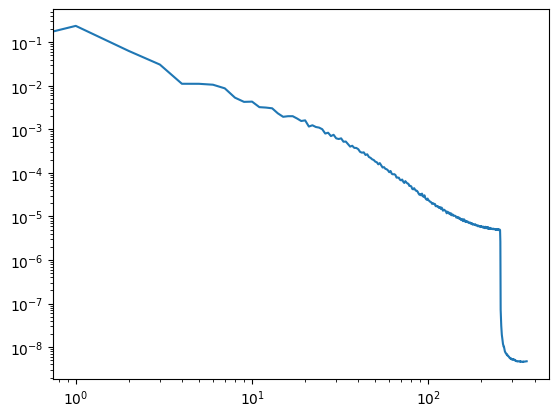

In [63]:
plt.loglog(en)

In [4]:
import numpy as np

def vorticity(u, v, dx, dy):

    # dvdx = (v(x+dx,y) - v(x-dx,y)) / (2*dx) 를 중앙차분으로 근사
    # dudy = (u(x,y+dy) - u(x,y-dy)) / (2*dy) 를 중앙차분으로 근사

    v_pad = np.pad(v, pad_width=1, mode='edge')
    u_pad = np.pad(u, pad_width=1, mode='edge')

    # dvdx 계산
    dvdx = (v_pad[1:-1, 2:] - v_pad[1:-1, :-2]) / (2 * dx)
    
    # dudy 계산
    dudy = (u_pad[2:, 1:-1] - u_pad[:-2, 1:-1]) / (2 * dy)
    
    # 와도 = dvdx - dudy
    omega = dvdx - dudy

    return omega


In [5]:
file = '../proceed_data/proceed_data_v_given/processed_data_u/25_ux_uy_data.txt'
file_vor = '../proceed_data/proceed_data_v_given/processed_data_vor/25_vor_data.txt'

In [6]:
vor, time = get_vorticity(file_vor)
print(len(vor))

1048576


In [18]:
file = '../proceed_data/proceed_data_v_given/processed_data_u/25_ux_uy_data.txt'
uux, uuy = sep(file)
uux, uuy = resizing(uux, uuy)
omega = vorticity(uux, uuy, 6.283/1024, 6.2831024)

In [22]:
vor = vor.reshape(1024,1024)

In [20]:
omega

array([[-0.490317  , -0.96147854, -0.86758479, ..., -0.97118964,
        -0.9735584 , -0.46726047],
       [-0.51360978, -0.99609926, -0.87765722, ..., -0.92287275,
        -0.9342996 , -0.45842343],
       [-0.51376908, -0.98885318, -0.86349801, ..., -0.88339368,
        -0.90248566, -0.45082883],
       ...,
       [-0.47898111, -0.96175086, -0.88197209, ..., -0.99347488,
        -0.96633039, -0.45871892],
       [-0.48683597, -0.96056452, -0.86548687, ..., -0.98415059,
        -0.9643254 , -0.45956386],
       [-0.47901406, -0.94576864, -0.86369492, ..., -0.99098667,
        -0.9774396 , -0.46362926]])

In [24]:
def energy_spectrum(nx,ny,w):
    
    '''
    Computation of energy spectrum and maximum wavenumber from vorticity field
    
    Inputs
    ------
    nx,ny : number of grid points in x and y direction
    w : vorticity field in physical spce (including periodic boundaries)
    
    Output
    ------
    en : energy spectrum computed from vorticity field
    n : maximum wavenumber
    '''
    
    epsilon = 1.0e-6
    dx = 6.283/1024
    dy = 6.283/1024

    kx = np.empty(nx)
    ky = np.empty(ny)
    
    kx[0:int(nx/2)] = 2*np.pi/(np.float64(nx)*dx)*np.float64(np.arange(0,int(nx/2)))
    kx[int(nx/2):nx] = 2*np.pi/(np.float64(nx)*dx)*np.float64(np.arange(-int(nx/2),0))

    ky[0:ny] = kx[0:ny]
    
    kx[0] = epsilon
    ky[0] = epsilon

    kx, ky = np.meshgrid(kx, ky, indexing='ij')
    
    a = pyfftw.empty_aligned((nx,ny),dtype= 'complex128')
    b = pyfftw.empty_aligned((nx,ny),dtype= 'complex128')

    fft_object = pyfftw.FFTW(a, b, axes = (0,1), direction = 'FFTW_FORWARD')
    wf = fft_object(w[0:nx,0:ny]) 
    
    es =  np.empty((nx,ny))
    
    kk = np.sqrt(kx[:,:]**2 + ky[:,:]**2)
    es[:,:] = np.pi*((np.abs(wf[:,:])/(nx*ny))**2)/kk
    
    n = int(np.sqrt(nx*nx + ny*ny)/2.0)-1
    
    en = np.zeros(n+1)
    
    for k in range(1,n+1):
        en[k] = 0.0
        ic = 0
        ii,jj = np.where((kk[1:,1:]>(k-0.5)) & (kk[1:,1:]<(k+0.5)))
        ic = ii.size
        ii = ii+1
        jj = jj+1
        en[k] = np.sum(es[ii,jj])
                    
        en[k] = en[k]/ic
        
    return en, n

In [25]:
ene, ne = energy_spectrum(1024, 1024, vor)

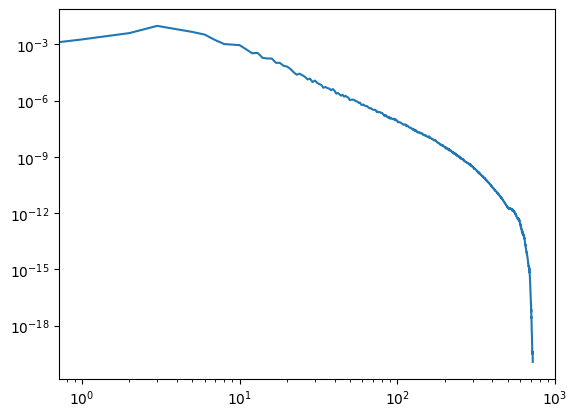

In [26]:
plt.loglog(ene)

In [27]:
k, ek = get_ek(file)

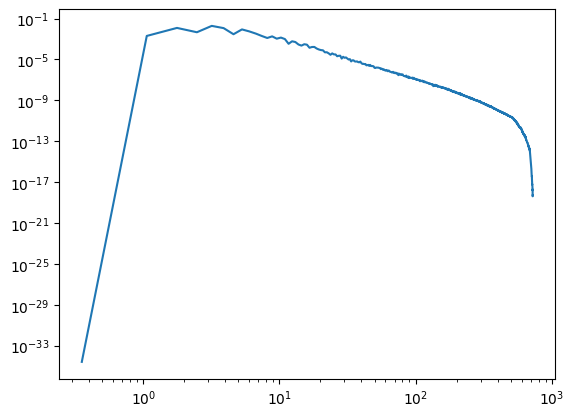

In [28]:
plt.loglog(k, ek)

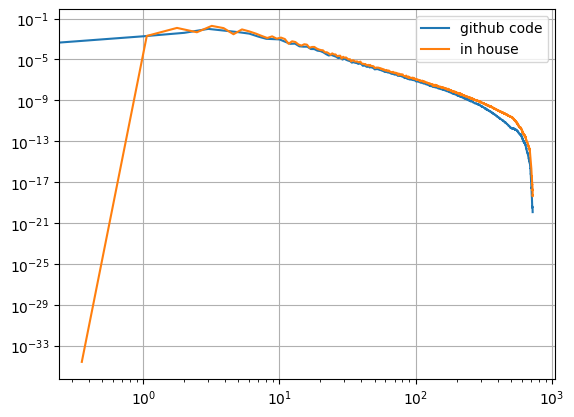

In [31]:
plt.figure()
# using vorticity
plt.loglog(ene, label = 'github code')
# using velocity field
plt.loglog(k, ek, label = 'in house')
plt.grid()
plt.legend()
plt.show()

In [121]:
def ek(u, v, w, n_bins):

    Ny, Nx, Nz = u.shape
    Lx = 6.283
    Ly = 6.283
    Lz = 6.283
    
    dx = Lx / Nx
    dy = Ly / Ny
    dz = Lz / Nz

    u_prime = u - np.mean(u)
    v_prime = v - np.mean(v)
    w_prime = w - np.mean(w)

    U_hat = np.fft.fft2(u_prime)
    V_hat = np.fft.fft2(v_prime)
    W_hat = np.fft.fft2(w_prime)

    PS = (np.abs(U_hat)**2 + np.abs(V_hat)**2 + np.abs(W_hat)**2) / (Nx * Ny)**2
    
    kx = 2.0*np.pi * np.fft.fftfreq(Nx, d=dx)
    ky = 2.0*np.pi * np.fft.fftfreq(Ny, d=dy)
    kz = 2.0*np.pi * np.fft.fftfreq(Nz, d=dy)
    
    KX, KY, KZ = np.meshgrid(kx, ky, kz)
    
    K_mag = np.sqrt(KX**2 + KY**2 + KZ**2)
    
    k_max = K_mag.max()
    
    bins = np.linspace(0, k_max, n_bins+1)
    
    E_k = np.zeros(n_bins)
    k_vals = np.zeros(n_bins)
    
    for i in range(n_bins):
        k_min = bins[i]
        k_max_ = bins[i+1]
        
        mask = (K_mag >= k_min) & (K_mag < k_max_)
        
        shell_sum = np.sum(PS[mask])
        
        k_mid = 0.5*(k_min + k_max_)
        
        E_k[i] = shell_sum
        k_vals[i] = k_mid

    return k_vals, E_k

In [112]:
ux = data[100, :, 0, :, 0]  # ux (512, 512)
uy = data[100, :, 0, :, 1]  # uy (512, 512)
uz = data[100, :, 0, :, 2]  # uy (512, 512)
k, ek = ek(ux, uy, uz, 100)

IndexError: too many indices for array: array is 2-dimensional, but 5 were indexed

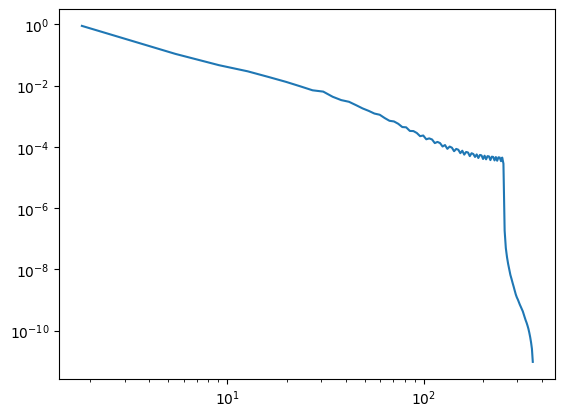

In [68]:
plt.loglog(k, ek)

In [114]:
from Function import *
data123 = np.load("velocity_data_1000_1024_1_1024.npy")
ux = data123[0, :, 0, :, 0]  # ux (512, 512)
uy = data123[0, :, 0, :, 1]  # uy (512, 512)

k_vals4, E_k4 = ek(ux, uy, 50)

k, e_k = ek(u, v, 480)

ValueError: not enough values to unpack (expected 2, got 1)

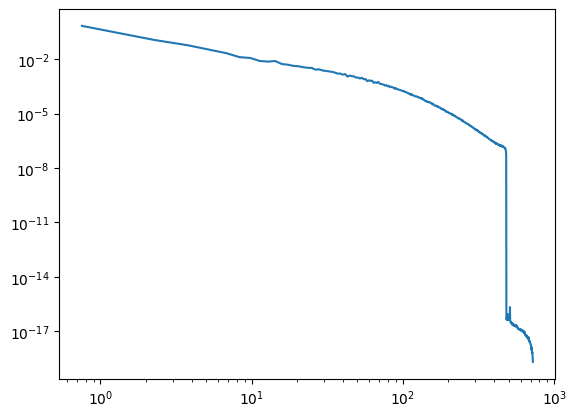

In [91]:
plt.loglog(k, e_k)

In [138]:
data = np.loadtxt("velocityfld_ascii.dat", skiprows=2, usecols=(3, 4, 5))
u = data[:, 0]  # 4번째 열 (u)
v = data[:, 1]  # 5번째 열 (v)
w = data[:, 2]  # 5번째 열 (v)
w.shape #84 84 84


(592704,)

In [146]:
N = 84

u = u.reshape((N, N, N))
v = v.reshape((N, N, N))
w = v.reshape((N, N, N))

k, e_k = ek(u, v, w, 84)

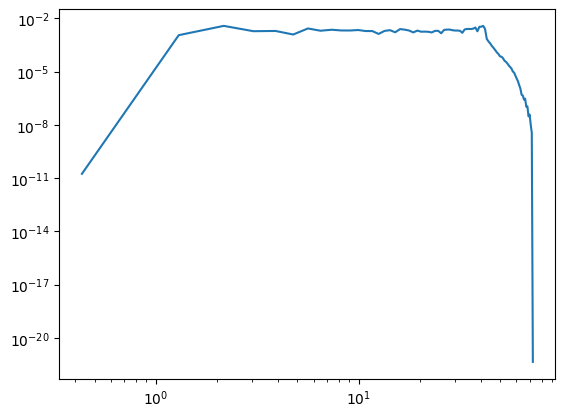

In [147]:
plt.loglog(k, e_k)

In [148]:
data124 = np.loadtxt("Ek_Spectrum.dat")
kk = data124[:, 0]
ekek = data124[:, 1]


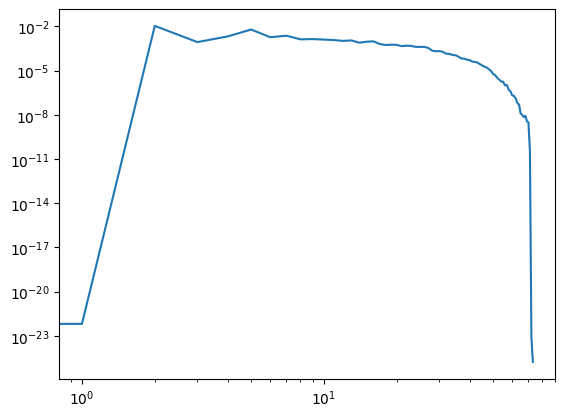

In [149]:
plt.loglog(kk, ekek)

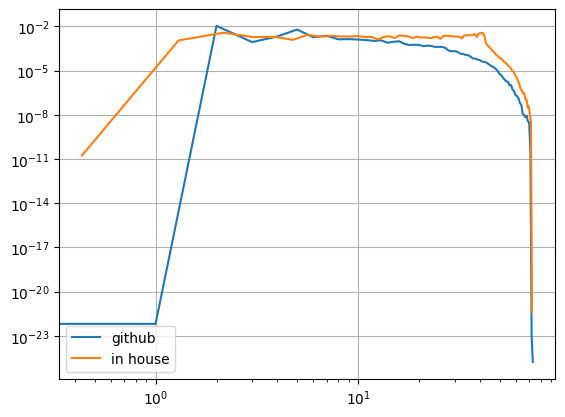

In [150]:
plt.figure()
plt.loglog(kk, ekek, label = 'github')
plt.loglog(k, e_k, label = 'in house')
plt.legend()
plt.grid()
plt.show()

In [2]:
from powerspec import *

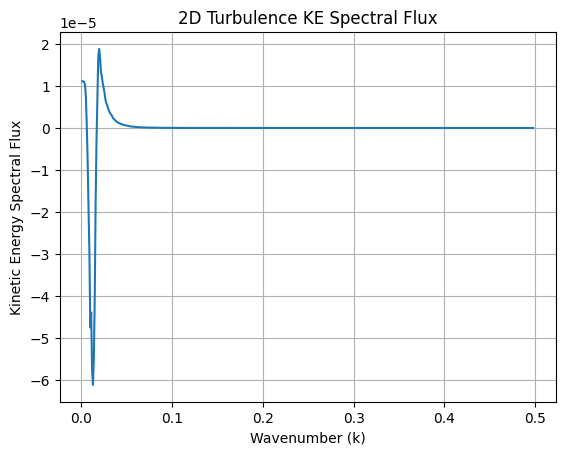

In [17]:
# 2D 난류 시뮬레이션 설정
N = 1024
Lx, Ly = 2 * 6.283, 2 * 6.283
x = np.linspace(0, Lx, N, endpoint=False)
y = np.linspace(0, Ly, N, endpoint=False)
X, Y = np.meshgrid(x, y)  # 2D meshgrid

file = '../proceed_data/proceed_data_v_given/processed_data_u/0.6_ux_uy_data.txt'
uux, uuy = sep(file)
uux, uuy = resizing(uux, uuy)

# 스펙트럼 플럭스 계산
wavenumber, flux = spectra_flux(uux, uuy, X, Y, window=None, detrend=None)

# 결과 시각화
import matplotlib.pyplot as plt

plt.plot(wavenumber, flux)
plt.xlabel('Wavenumber (k)')
plt.ylabel('Kinetic Energy Spectral Flux')
plt.title('2D Turbulence KE Spectral Flux')
plt.grid()
plt.show()


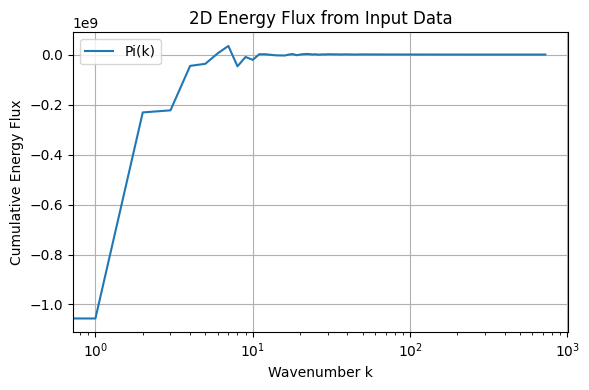

In [30]:
import numpy as np

def compute_2d_energy_flux_from_data(u_real, v_real,
                                     Lx=2.0*np.pi, Ly=2.0*np.pi,
                                     remove_divergence=False):
    """
    주어진 2D 속도장 (u, v)에 대해 에너지 플럭스 Pi(k)를 계산.
    
    Parameters
    ----------
    u_real, v_real : 2D numpy array (shape = (Ny, Nx))
        물리공간에서의 속도장 (x방향 성분 u, y방향 성분 v).
        주기적 경계 조건 가정.
    Lx, Ly : float
        도메인 물리적 크기. 기본값 = 2π x 2π
    remove_divergence : bool
        True이면, 푸리에공간에서 Helmholtz 투영을 통해 발산 성분 제거.
        False이면, 입력 속도장을 그대로 사용.
        
    Returns
    -------
    k_array : 1D numpy array
        파수 k (정수 범위 0 ~ kmax)
    Pi_cumulative : 1D numpy array
        누적(cumulative) 에너지 플럭스 배열. Pi_cumulative[k] = ∑_{m <= k} shell_flux[m].
        즉, |p| ≤ k인 모든 파수 모드에 대한 비점성 에너지 전이율 합.
    
    Notes
    -----
    - (u·∇)u = ( u * ∂u/∂x + v * ∂u/∂y ), (u·∇)v = ( u * ∂v/∂x + v * ∂v/∂y ).
    - 에너지 플럭스:
        Pi(k) = ∑_{|p| ≤ k} Re[ u_hat^*(p)*conv_u_hat(p) + v_hat^*(p)*conv_v_hat(p) ].
    """
    Ny, Nx = u_real.shape
    dx = Lx / Nx
    dy = Ly / Ny

    # ----------------------------------------------------------------
    # 1) 푸리에변환 (FFT) -> u_hat, v_hat
    # ----------------------------------------------------------------
    u_hat = np.fft.fft2(u_real)
    v_hat = np.fft.fft2(v_real)
    
    # 파수공간의 kx, ky (2π 주기 대응)
    kx = 2.0*np.pi * np.fft.fftfreq(Nx, d=dx)  # shape=(Nx,)
    ky = 2.0*np.pi * np.fft.fftfreq(Ny, d=dy)  # shape=(Ny,)
    KX, KY = np.meshgrid(kx, ky)               # shape=(Ny, Nx)
    K2 = KX**2 + KY**2
    KK = np.sqrt(K2)  # 각 모드의 파수 크기
    
    # ----------------------------------------------------------------
    # 2) (옵션) 발산 제거 (Helmholtz projector)
    # ----------------------------------------------------------------
    if remove_divergence:
        for j in range(Ny):
            for i in range(Nx):
                if K2[j, i] == 0.0:
                    continue  # (kx, ky) = (0,0)은 건드리지 않음
                kxi = KX[j, i]
                kyi = KY[j, i]
                div_factor = (u_hat[j, i]*kxi + v_hat[j, i]*kyi) / (kxi**2 + kyi**2)
                u_hat[j, i] -= div_factor * kxi
                v_hat[j, i] -= div_factor * kyi
    
        # 다시 실공간 속도장 갱신 (발산=0된 상태)
        u_real = np.fft.ifft2(u_hat).real
        v_real = np.fft.ifft2(v_hat).real
    
    # ----------------------------------------------------------------
    # 3) 비점성 항 (convective term) 계산
    #    conv_u = (u·∇)u,  conv_v = (u·∇)v
    # ----------------------------------------------------------------
    # 편미분 함수 (푸리에공간 이용)
    def partial_x(f_hat):
        return np.fft.ifft2(1j * KX * f_hat).real
    
    def partial_y(f_hat):
        return np.fft.ifft2(1j * KY * f_hat).real
    
    # (a) 다시 u_hat, v_hat (remove_divergence=True이면 이미 갱신됨)
    u_hat = np.fft.fft2(u_real)
    v_hat = np.fft.fft2(v_real)
    
    # (b) ux, uy, vx, vy
    ux = partial_x(u_hat)
    uy = partial_y(u_hat)
    vx = partial_x(v_hat)
    vy = partial_y(v_hat)
    
    # (c) conv_u, conv_v (물리공간)
    conv_u = u_real * ux + v_real * uy
    conv_v = u_real * vx + v_real * vy
    
    # (d) conv_u_hat, conv_v_hat
    conv_u_hat = np.fft.fft2(conv_u)
    conv_v_hat = np.fft.fft2(conv_v)
    
    # ----------------------------------------------------------------
    # 4) 쉘별 에너지 플럭스 계산
    #    Pi(k) = ∑_{|p| ≤ k} Re[ u_hat^*(p)*conv_u_hat(p) + v_hat^*(p)*conv_v_hat(p) ]
    # ----------------------------------------------------------------
    kmax = int(np.sqrt( (Nx//2)**2 + (Ny//2)**2 ))  # 가능한 최대 파수 대략 설정
    flux_shell = np.zeros(kmax+1, dtype=np.float64)
    
    for j in range(Ny):
        for i in range(Nx):
            kn = KK[j,i]
            ik = int(round(kn))
            if ik <= kmax:
                du = (u_hat[j,i].conjugate() * conv_u_hat[j,i]
                      + v_hat[j,i].conjugate() * conv_v_hat[j,i])
                flux_shell[ik] += du.real  # 실수부 누적
    
    # 쉘별이 아닌, 누적(cumulative)으로 바꾸려면:
    Pi_cumulative = np.cumsum(flux_shell)  # Pi_cumulative[k] = ∑_{m=0..k} flux_shell[m]
    
    k_array = np.arange(kmax+1)
    return k_array, Pi_cumulative


# -------------------------------
# 사용 예시 (데모)
# -------------------------------
if __name__ == "__main__":
    import matplotlib.pyplot as plt
    file = '../proceed_data/proceed_data_v_given/processed_data_u/20_ux_uy_data.txt'
    uux, uuy = sep(file)
    uux, uuy = resizing(uux, uuy)
    
    # 가정: 어떤 (u,v) 2D 배열이 이미 있음
    # 여기서는 간단히 랜덤 생성 (발산=0 투영) 예시
    Nx, Ny = 1024, 1024
    Lx, Ly = 2.0*6.283, 2.0*6.283
    
    # 무작위 초기화

    u0 = uux
    v0 = uuy
    
    # 위 함수로 플럭스 계산
    k_vals, Pi_vals = compute_2d_energy_flux_from_data(u0, v0,
                                                       Lx=Lx, Ly=Ly,
                                                       remove_divergence=True)
    
    # 결과 시각화
    plt.figure(figsize=(6,4))
    plt.plot(k_vals, Pi_vals, label='Pi(k)')
    plt.xlabel('Wavenumber k')
    plt.ylabel('Cumulative Energy Flux')
    plt.title('2D Energy Flux from Input Data')
    plt.xscale('log')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [31]:
def energy_flux(u, v, L=6.283):
    N = u.shape[0]
    dx = dy = L / N
    
    u_hat = fft2(u)
    v_hat = fft2(v)
    
    kx = np.fft.fftfreq(N, d=dx) * 2 * np.pi
    ky = np.fft.fftfreq(N, d=dy) * 2 * np.pi
    KX, KY = np.meshgrid(kx, ky)
    k_mag = np.sqrt(KX**2 + KY**2)
    
    du_dx = np.gradient(u, dx, axis=1)
    du_dy = np.gradient(u, dy, axis=0)
    dv_dx = np.gradient(v, dx, axis=1)
    dv_dy = np.gradient(v, dy, axis=0)
    
    # Nonlinear terms
    Nx = u * du_dx + v * du_dy
    Ny = u * dv_dx + v * dv_dy
    
    # FFT of nonlinear terms
    Nx_hat = fft2(Nx)
    Ny_hat = fft2(Ny)
    
    # Energy transfer function
    T_k = -np.real(u_hat.conj() * Nx_hat + v_hat.conj() * Ny_hat)
    
    # Shell averaging
    k_bins = np.arange(1, 1024)
    T_k_binned = np.zeros_like(k_bins, dtype=np.float64)
    
    # Improved shell averaging with proper normalization
    for i, k in enumerate(k_bins):
        mask = (k_mag >= k) & (k_mag < k+1)
        if np.any(mask):
            T_k_binned[i] = np.sum(T_k[mask])  # Normalized by number of modes
    
    # Energy flux
    Pi_k = np.cumsum(T_k_binned[::-1])[::-1]
    
    return k_bins, Pi_k

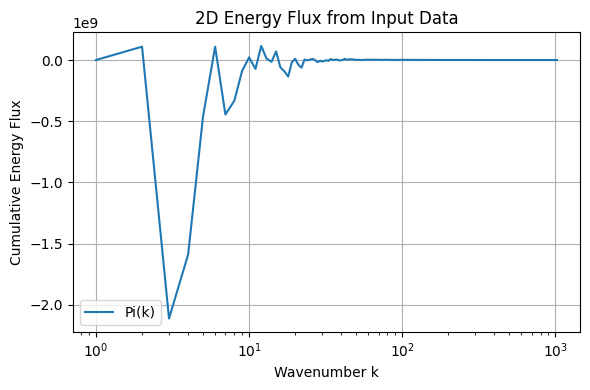

In [32]:
kbin, pik = energy_flux(uux, uuy, L=6.283)
plt.figure(figsize=(6,4))
plt.plot(kbin, pik, label='Pi(k)')
plt.xlabel('Wavenumber k')
plt.ylabel('Cumulative Energy Flux')
plt.title('2D Energy Flux from Input Data')
plt.xscale('log')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

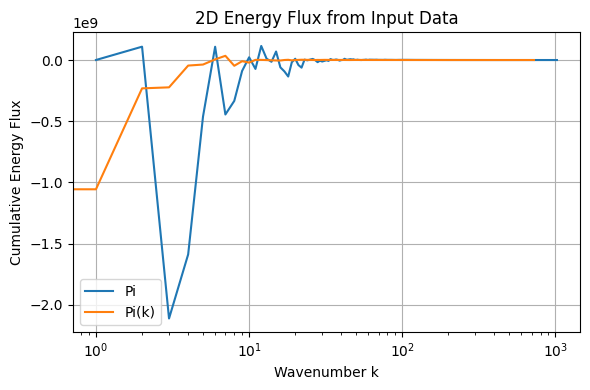

In [33]:
kbin, pik = energy_flux(uux, uuy, L=6.283)
plt.figure(figsize=(6,4))
plt.plot(kbin, pik, label='Pi')
plt.plot(k_vals, Pi_vals, label='Pi(k)')
plt.xlabel('Wavenumber k')
plt.ylabel('Cumulative Energy Flux')
plt.title('2D Energy Flux from Input Data')
plt.xscale('log')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
def disss(data, nu):
    n_time_steps = data.shape[0]  # 전체 시간 스텝 개수
    E_k_avg = np.zeros(n_time_steps)
    for t in range(n_time_steps):
        ux = data[t, :, 0, :, 0]  # ux (512, 512)
        uy = data[t, :, 0, :, 1]  # uy (512, 512)

        E_k = dissp_rate(ux, nu)
        E_k_avg += E_k

    E_k_avg /= n_time_steps  # 평균화

    return E_k_avg

nu = 0.000185    
diss123 = disss(data, nu)

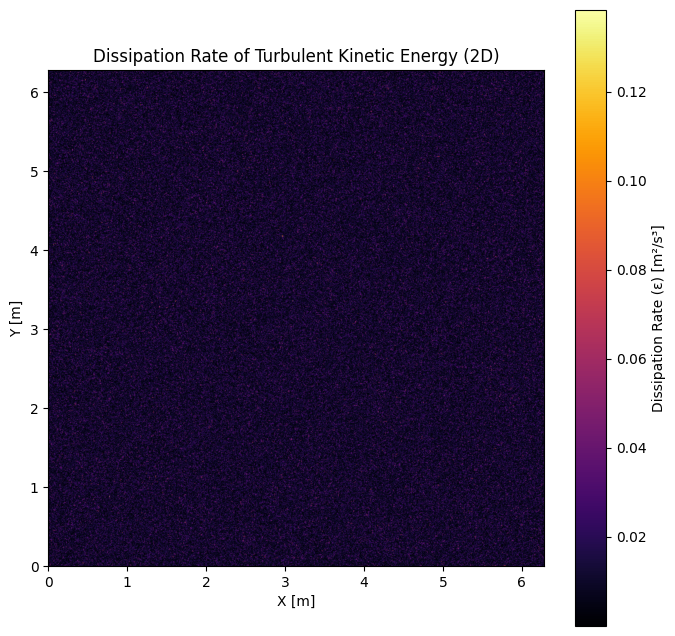

In [14]:
import numpy as np
import matplotlib.pyplot as plt

nx, ny = 1024, 1024
dx, dy = 2* np.pi/nx, 2* np.pi/ny
# for t in range(n_time_steps):
#     ux = data[t, :, 0, :, 0]  # ux (512, 512)
#     uy = data[t, :, 0, :, 1]  # uy (512, 512)
kinematic_viscosity = 1.5e-5  # Example value in m²/s

u = np.random.randn(nx, ny) * 0.1  # u-component velocity
v = np.random.randn(nx, ny) * 0.1  # v-component velocity

# Compute velocity gradients using central difference scheme
du_dx = (np.roll(u, -1, axis=0) - np.roll(u, 1, axis=0)) / (2 * dx)
du_dy = (np.roll(u, -1, axis=1) - np.roll(u, 1, axis=1)) / (2 * dy)
dv_dx = (np.roll(v, -1, axis=0) - np.roll(v, 1, axis=0)) / (2 * dx)
dv_dy = (np.roll(v, -1, axis=1) - np.roll(v, 1, axis=1)) / (2 * dy)

# Compute strain rate tensor components
S11 = du_dx
S22 = dv_dy
S12 = 0.5 * (du_dy + dv_dx)  # Symmetric component

# Compute strain rate magnitude
Sij_Sij = S11**2 + 2 * S12**2 + S22**2

# Compute dissipation rate ε
epsilon = 2 * kinematic_viscosity * Sij_Sij

# Plot the dissipation rate
plt.figure(figsize=(8, 8))
plt.imshow(epsilon, cmap="inferno", origin="lower", extent=[0, nx * dx, 0, ny * dy])
plt.colorbar(label="Dissipation Rate (ε) [m²/s³]")
plt.title("Dissipation Rate of Turbulent Kinetic Energy (2D)")
plt.xlabel("X [m]")
plt.ylabel("Y [m]")
plt.show()


In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Define grid size
nx, ny = 1024, 1024
dx, dy = 2 * np.pi / nx, 2 * np.pi / ny

# Number of time steps
n_time_steps = 1000  # Example number of time steps

# Initialize sum arrays for time-averaging
ux_sum = np.zeros((512, 512))
uy_sum = np.zeros((512, 512))

# Compute time-averaged velocity field
for t in range(n_time_steps):
    ux = data[t, :, 0, :, 0]  # Extract ux (512, 512)
    uy = data[t, :, 0, :, 1]  # Extract uy (512, 512)
    
    ux_sum += ux
    uy_sum += uy

ux_avg = ux_sum / n_time_steps
uy_avg = uy_sum / n_time_steps

# Compute velocity gradients using central difference scheme
du_avg_dx = (np.roll(ux_avg, -1, axis=0) - np.roll(ux_avg, 1, axis=0)) / (2 * dx)
du_avg_dy = (np.roll(ux_avg, -1, axis=1) - np.roll(ux_avg, 1, axis=1)) / (2 * dy)
dv_avg_dx = (np.roll(uy_avg, -1, axis=0) - np.roll(uy_avg, 1, axis=0)) / (2 * dx)
dv_avg_dy = (np.roll(uy_avg, -1, axis=1) - np.roll(uy_avg, 1, axis=1)) / (2 * dy)

# Compute strain rate tensor components
S11 = du_avg_dx
S22 = dv_avg_dy
S12 = 0.5 * (du_avg_dy + dv_avg_dx)  # Symmetric component

# Compute strain rate magnitude
Sij_Sij = S11**2 + 2 * S12**2 + S22**2

# Define kinematic viscosity (example value)
kinematic_viscosity = 0.000185

# Compute dissipation rate ε
epsilon_avg = 2 * kinematic_viscosity * Sij_Sij

In [5]:
import numpy as np

def dissipation_rate_2d(U, V, nu):
    """
    2차원 유동 (U(x,y), V(x,y)) 에 대하여,
    점성 소산율 epsilon = 2 * nu * < S_ij S_ij > 를 계산하는 함수.
    
    - U, V : 2D 배열 (shape = (N, N))   (주기적 경계조건 가정)
    - nu   : 동점성계수(kinematic viscosity)
    - 도메인 크기 L=2π, 격자수 N 가정
      (질문자 코드와 동일하게 L=6.283, N=1024 로 예시)
    
    반환값:
      epsilon : 계산된 2차원 소산율 (스칼라)
    """
    # (질문자 코드와 동일하게) 도메인 길이 L = 2π, 격자점수 N=U.shape[0] 가정
    L = np.pi * 2
    N = U.shape[0]
    dx = L / N

    # 1) 평균을 빼서 요동(플럭추에이션) 성분만 고려할 수도 있음
    #    (원본 코드에서 ux_prime = ux - mean(ux) 했던 부분)
    U_prime = U - np.mean(U)
    V_prime = V - np.mean(V)

    # 2) 중앙차분(주기경계조건)으로 각 편미분 계산
    #    dU/dx, dU/dy, dV/dx, dV/dy
    dUdx = (np.roll(U_prime, -1, axis=1) - np.roll(U_prime, 1, axis=1)) / (2 * dx)
    dUdy = (np.roll(U_prime, -1, axis=0) - np.roll(U_prime, 1, axis=0)) / (2 * dx)
    dVdx = (np.roll(V_prime, -1, axis=1) - np.roll(V_prime, 1, axis=1)) / (2 * dx)
    dVdy = (np.roll(V_prime, -1, axis=0) - np.roll(V_prime, 1, axis=0)) / (2 * dx)

    # 3) 변형률 텐서 S_ij = 1/2 (∂u_i/∂x_j + ∂u_j/∂x_i)
    #    여기서 (u1,u2)=(U,V), (x1,x2)=(x,y)
    #    S_11 = ∂U/∂x,   S_22 = ∂V/∂y
    #    S_12 = S_21 = 1/2 ( ∂U/∂y + ∂V/∂x )
    S11 = dUdx
    S22 = dVdy
    S12 = 0.5 * (dUdy + dVdx)  # S21과 동일

    # 4) S_ij S_ij = S11^2 + 2*S12^2 + S22^2
    SijSij = S11**2 + 2.0*(S12**2) + S22**2

    # 5) 소산율: epsilon = 2 * nu * < S_ij S_ij >
    epsilon = 2.0 * nu * np.mean(SijSij)
    
    return epsilon


In [6]:
eps_avg = np.array([])
eps = np.array([])
for t in range(1, 1000, 1):
    ux = data[t, :, 0, :, 0]
    uy = data[t, :, 0, :, 1]
    epsilon = dissipation_rate_2d(ux, uy, 0.000185)
    eps = np.append(eps, epsilon)

print(np.mean(epsilon))

0.023139498291015626


In [7]:
files = [
    #'../proceed_data/proceed_data_v_given/processed_data_u/0_ux_uy_data.txt',
    #'../proceed_data/proceed_data_v_given/processed_data_u/0.2_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/0.4_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/1_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/5_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/10_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/15_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/20_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/25_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/30_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/35_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/40_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/45_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/50_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/70_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/90_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/110_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/130_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/150_ux_uy_data.txt',
    
]

In [26]:
# eps_avg = np.array([])
# eps = np.array([])
# plt.figure()
# for file in files:
#     ux, uy = sep(file)
#     ux, uy =resizing(ux, uy)
#     epsilon = dissipation_rate_2d(ux, uy, 0.00001)
#     eps = np.append(eps, epsilon)
#     print(epsilon)
# print(np.mean(epsilon))

file = '../proceed_data/proceed_data_v_given/processed_data_u/45_ux_uy_data.txt'
k, data = get_ek(file)

In [9]:
eps_avg = np.array([])
eps = np.array([])
for file in files:
    ux, uy = sep(file)
    ux, uy =resizing(ux, uy)
    epsilon = dissp_rate(ux, 0.00001)
    eps = np.append(eps, epsilon)
print(np.mean(epsilon))

ε: 3.963887e-05 m²/s³
ε: 3.998007e-05 m²/s³
ε: 2.827554e-05 m²/s³
ε: 1.656936e-05 m²/s³
ε: 1.254915e-05 m²/s³
ε: 9.027902e-06 m²/s³
ε: 7.649634e-06 m²/s³
ε: 7.134941e-06 m²/s³
ε: 5.781600e-06 m²/s³
ε: 5.885801e-06 m²/s³
ε: 5.516056e-06 m²/s³
ε: 5.050336e-06 m²/s³
ε: 3.902053e-06 m²/s³
ε: 3.301975e-06 m²/s³
ε: 3.204711e-06 m²/s³
ε: 2.550474e-06 m²/s³
ε: 2.161404e-06 m²/s³
2.1614036148329662e-06


In [4]:
#난류 물성치 구하는 코드
# !미분시 경계조건을 고려하지 않음

#에너지 소산율 구하는 코드
import numpy as np

def ddy(f, dx = 6.283/1024): #y방향 미분
  dudy = np.gradient(f,axis=0)
  dudy = dudy/dx
  return dudy

def ddx(f, dx = 6.283/1024): #x방향 미분
  dudx = np.gradient(f,axis=1)
  dudx = dudx/dx
  return dudx

def energy_dissipation(u,v,viscosity): #에너지 소산율 계산
    dudx = ddx(u)
    dvdy = ddy(v)
    dudy = ddy(u)
    dvdx = ddx(v)
    mu = 0.000185 #viscosity

    energy_dissipation = mu*(2*(dudx**2 + dvdy**2) + (dudy + dvdx)**2)
    return 2 * np.mean(energy_dissipation) 

In [5]:
eps_avg = np.array([])
eps = np.array([])
for t in range(1, 1000, 1):
    ux = data[t, :, 0, :, 0]
    uy = data[t, :, 0, :, 1]
    epsilon = energy_dissipation(ux, uy, 0.000185)
    eps = np.append(eps, epsilon)

print(np.mean(epsilon))

0.11192403733730316


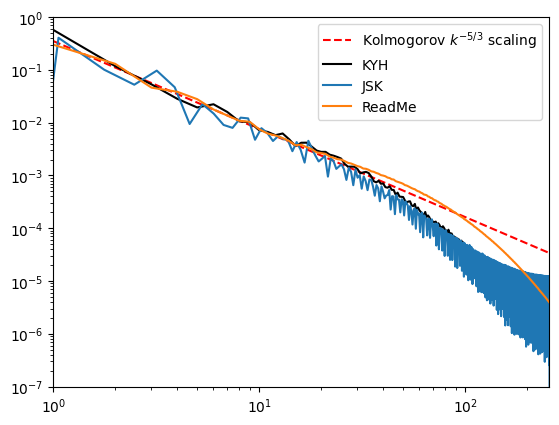

In [30]:
#에너지 스펙트럼 구하는 코드
L = 2*np.pi #도메인
n = 512 #총 격자 수


for t in range(1, 1000, 1):
    u = data[t, :, 0, :, 0]
    v = data[t, :, 0, :, 1]
    
    u_fluc = u - np.mean(u)
    v_fluc = v - np.mean(v)
    u_hat = np.fft.fft2(u_fluc)/n**2
    v_hat = np.fft.fft2(v_fluc)/n**2
    
    tke = 0.5 * (np.abs(u_hat)**2 + np.abs(v_hat)**2)
    
    kx = np.fft.fftfreq(n, d=L/n) * 2*np.pi
    ky = np.fft.fftfreq(n, d=L/n) * 2*np.pi
    kx, ky = np.meshgrid(kx, ky)
    k2 = kx**2 + ky**2
    kmod = np.sqrt(k2)
    k_bins = np.arange(1, n//2)
    epsilon = 0.103  # Energy dissipation rate
    kolmo = 1.6 * epsilon**(2/3) * k_bins**(-5/3)
    
    E_k = np.zeros_like(k_bins, dtype=np.float64)
    dk = (k_bins[1] - k_bins[0])
    
    for i, k in enumerate(k_bins):
        mask = (kmod >= k - dk/2) & (kmod < k + dk/2)
        E_k[i] = np.sum(tke[mask])

plt.figure()
plt.loglog(k_bins, kolmo, '--r', label=r"Kolmogorov $k^{-5/3}$ scaling")
plt.loglog(k_bins, E_k*2, '-k', label="KYH")
plt.xlim(1, n//2)
plt.ylim(1e-7, 1e0)
plt.loglog(k_vals, E_k_avg, label = 'JSK')
plt.loglog(k_vals2, E_k_vals2, label = 'ReadMe')
plt.legend()
plt.show()

In [7]:
eps_avg = np.array([])
eps = np.array([])
for t in range(1, 1000, 1):
    ux = data[t, :, 0, :, 0]
    uy = data[t, :, 0, :, 1]
    epsilon = dissipation_rate_2d(ux, uy, 0.000185)
    eps = np.append(eps, epsilon)

print(np.mean(epsilon)*2)

0.0925579931640625


In [9]:
a = (0.103 - 0.0925579931640625)/0.103
b = (0.103 - 0.11192403733730316)/0.103
print(a, b)

0.10137870714502417 -0.08664113919711813


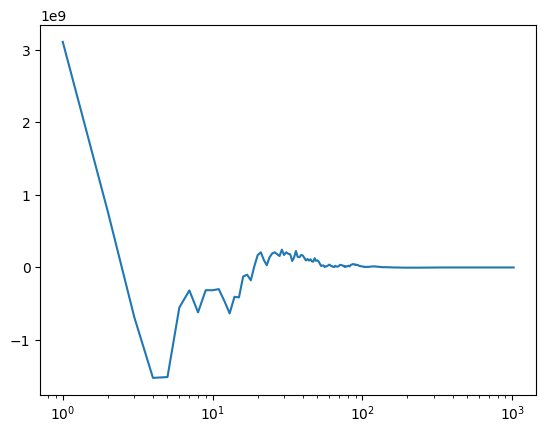

In [11]:
ux = data[200, :, 0, :, 0]
uy = data[200, :, 0, :, 1]

kbin, pik = energy_flux(ux, uy, L=6.283)
plt.plot(kbin, pik)
plt.xscale('log')


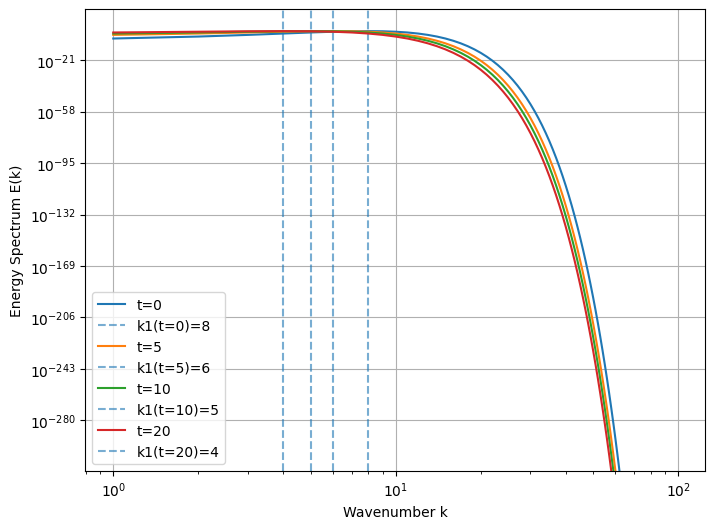

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# 시뮬레이션 데이터 예제 (시간별 에너지 스펙트럼)
time_steps = [0, 5, 10, 20]  # 분석할 시간 스텝
k_values = np.arange(1, 100)  # 파수 범위

# 예제 에너지 스펙트럼 (시간이 지남에 따라 낮은 k로 이동)
E_k_t = {
    0: np.exp(-((k_values - 8)/2)**2),
    5: np.exp(-((k_values - 6)/2)**2),
    10: np.exp(-((k_values - 5)/2)**2),
    20: np.exp(-((k_values - 4)/2)**2),
}

# 그래프 출력
plt.figure(figsize=(8,6))
for t in time_steps:
    plt.loglog(k_values, E_k_t[t], label=f't={t}')
    k1_t = k_values[np.argmax(E_k_t[t])]  # 최대값을 가지는 파수 찾기
    plt.axvline(k1_t, linestyle='--', alpha=0.6, label=f'k1(t={t})={k1_t}')

plt.xlabel('Wavenumber k')
plt.ylabel('Energy Spectrum E(k)')
plt.legend()
plt.grid()
plt.show()


In [ ]:
# ==========================================
# 2. 슬라이딩 윈도우로 local slope 계산
# ==========================================
def sliding_window_slope(k, e_k, window_size=10):
    """
    k와 e_k (or log(k), log(e_k))에 대해
    일정 window 크기로 데이터를 잘라서 선형 회귀 -> slope(기울기)만 추출
    return: slopes (각 window 구간의 기울기 배열)
    """
    log_k = np.log10(k)
    log_e_k = np.log10(e_k)
    n = len(k)

    slopes = []
    # window 시작점 i가 0 ~ (n-window_size)까지 변화
    for i in range(n - window_size + 1):
        x_slice = log_k[i : i + window_size]
        y_slice = log_e_k[i : i + window_size]
        # polyfit으로 1차식 계수: 기울기와 절편
        slope, intercept = np.polyfit(x_slice, y_slice, 1)
        slopes.append(slope)
    slopes = np.array(slopes)
    return slopes

# ==========================================
# 3. 목표 기울기 근방 오차, 구간 식별
# ==========================================
def find_best_region_for_slope(slopes, target_slope, threshold=0.1, min_length=5):
    """
    slopes: 슬라이딩 윈도우에서 얻은 기울기 배열
    target_slope: 예) -5/3, -4 등 우리가 찾고 싶은 스펙트럼 기울기
    threshold: 기울기가 target_slope와 얼마나 가까워야 하는지 허용 오차
    min_length: 구간 최소 길이 (슬라이딩 윈도우 인덱스 기준)

    return: (best_start, best_end)
      -> slopes[best_start : best_end]가 target_slope 근방에서 
         연속적으로 유지되는 가장 긴 구간(또는 가장 적합한 구간)
    """
    # |slope - target_slope| < threshold 인 영역을 찾는다
    condition = np.abs(slopes - target_slope) < threshold

    best_len = 0
    best_start, best_end = None, None

    current_start = None
    for i, cond in enumerate(condition):
        if cond:  # 조건을 만족하면
            if current_start is None:
                current_start = i
        else:
            # 조건 끊김
            if current_start is not None:
                length = i - current_start
                if length >= min_length and length > best_len:
                    best_len = length
                    best_start, best_end = current_start, i
                current_start = None

    # 루프 끝났을 때 구간이 유지되고 있을 가능성 체크
    if current_start is not None:
        length = len(condition) - current_start
        if length >= min_length and length > best_len:
            best_len = length
            best_start, best_end = current_start, len(condition)

    return best_start, best_end

# ==========================================
# 4. 찾은 구간에 대해 실제 log-선형회귀 수행
# ==========================================
def fit_region(k, e_k, window_size, start_idx, end_idx):
    """
    슬라이딩 윈도우 인덱스(start_idx, end_idx)에 해당하는
    실제 k, e_k의 구간에 대해 정확한 선형회귀를 수행
    (slopes의 인덱스 => 실제 데이터 인덱스로 변환 필요)
    """
    # slopes 배열의 i번째 원소는 원래 데이터에서 i ~ i+window_size-1까지를 의미
    data_start = start_idx
    data_end   = end_idx + window_size - 1  # end는 윈도우 끝자리를 포함해야 함

    log_k_slice = np.log10(k[data_start : data_end])
    log_e_slice = np.log10(e_k[data_start : data_end])
    slope, intercept = np.polyfit(log_k_slice, log_e_slice, 1)
    return slope, intercept, data_start, data_end

# ==========================================
# 5. 실제 실행 예시
# ==========================================
def analyze_spectrum(file_path, window_size=10, slope_targets=[-1.6667, -4]):
    """
    file_path에 대한 스펙트럼을 읽어서,
    -5/3 근처, -4 근처 두 구간을 자동 식별한 뒤
    최종적으로 그 구간에 대한 선형회귀 결과(기울기, 절편)와
    플롯을 보여주는 예시 함수
    """
    k, e_k = get_ek(file_path)
    slopes = sliding_window_slope(k, e_k, window_size=window_size)

    # plot 준비
    fig, ax = plt.subplots(figsize=(10,6))
    ax.scatter(k, e_k, color='blue', s=10, label='Raw E(k)')  # 스펙트럼 점
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('k')
    ax.set_ylabel('E(k)')
    ax.set_title(f"Energy Spectrum: {file_path}")

    # 대상 기울기들을 순회하며 구간 찾기
    colors = ['red','green','orange','purple']  # 원하는만큼
    for i, target_slope in enumerate(slope_targets):
        start_idx, end_idx = find_best_region_for_slope(
            slopes, target_slope, threshold=0.15, min_length=5
        )
        if start_idx is not None and end_idx is not None:
            # 해당 구간에 대해 실제 선형회귀
            slope, intercept, ds, de = fit_region(k, e_k, window_size, start_idx, end_idx)
            print(f"Target slope: {target_slope}, Found region: [{ds}:{de}] -> slope={slope:.3f}")
            # fitted line 그리기
            log_k_line = np.log10(k[ds:de])
            fit_line = 10**(slope * log_k_line + intercept)
            ax.plot(k[ds:de], fit_line, color=colors[i%len(colors)],
                    linewidth=2, label=f"Fitted slope ~ {slope:.2f}")

        else:
            print(f"Target slope: {target_slope}에 대해 적절한 구간을 찾지 못했습니다.")

    ax.legend()
    ax.grid(True)
    plt.show()


if __name__ == "__main__":
    files_list = [    
    '../proceed_data/proceed_data_v_given/processed_data_u/0.4_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/1_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/5_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/10_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/15_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/20_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/25_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/30_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/35_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/40_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/45_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/50_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/70_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/90_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/110_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/130_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/150_ux_uy_data.txt'
    ]

    for file_path in zip(files_list):
        analyze_spectrum(
            file_path, 
            window_size=10, 
            slope_targets=[-1.6667, -4]  # -5/3, -4
        )


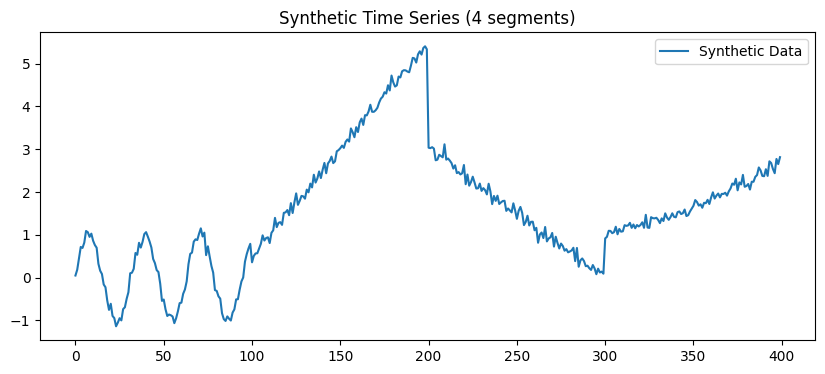

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 시드 고정
np.random.seed(42)

# 구간별 길이
n_points_per_segment = 100
t = np.arange(n_points_per_segment)

# 1) 진동 구간(사인파)
segment1 = np.sin(0.2 * t) + 0.1*np.random.randn(n_points_per_segment)

# 2) 선형 구간(기울기1)
slope1 = 0.05
segment2 = slope1 * t + 0.5 + 0.1*np.random.randn(n_points_per_segment)

# 3) 선형 구간(기울기2)
slope2 = -0.03
segment3 = slope2 * t + 3.0 + 0.1*np.random.randn(n_points_per_segment)

# 4) 지수 함수 구간
segment4 = np.exp(0.01 * t) + 0.1*np.random.randn(n_points_per_segment)

# 전체 시계열 합치기
data = np.concatenate([segment1, segment2, segment3, segment4])
time = np.arange(len(data))

plt.figure(figsize=(10,4))
plt.plot(time, data, label='Synthetic Data')
plt.title("Synthetic Time Series (4 segments)")
plt.legend()
plt.show()


Detected change points index: [15, 30, 50, 65, 80, 95, 115, 135, 155, 175, 200, 230, 260, 300, 360, 400]


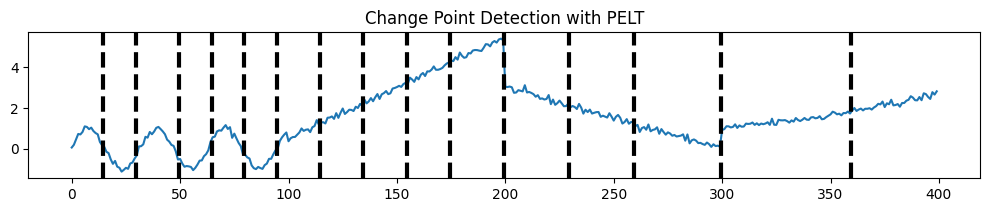

In [5]:
import ruptures as rpt

# 방법1: Pelt 알고리즘 예시
model = "l2"  # 손실함수: L2 norm
algo = rpt.Pelt(model=model).fit(data)
# 세그먼트 몇 개인지 모를 때(최대 세그먼트 개수 지정 가능):
pen = 5  # penalty (적절히 조정)
change_points = algo.predict(pen=pen)

print("Detected change points index:", change_points)

# 시각화
rpt.display(data, [], change_points)
plt.title("Change Point Detection with PELT")
plt.show()


In [6]:
from sklearn.linear_model import LinearRegression

def classify_segment(segment_data):
    x = np.arange(len(segment_data)).reshape(-1, 1)
    y = segment_data

    # (a) 선형 모델 적합
    lin_reg = LinearRegression().fit(x, y)
    y_pred_lin = lin_reg.predict(x)
    mse_lin = np.mean((y - y_pred_lin)**2)

    # (b) 지수 모델 적합 (log transform 후 선형 회귀)
    # 지수형이라고 가정: y = A * exp(Bx)
    # log(y) = log(A) + B*x 형태 -> log(y) vs x 선형회귀
    # 단, y가 양수인지 확인 필요
    if np.all(y > 0):
        y_log = np.log(y)
        lin_reg_exp = LinearRegression().fit(x, y_log)
        y_pred_exp = np.exp(lin_reg_exp.predict(x))
        mse_exp = np.mean((y - y_pred_exp)**2)
    else:
        mse_exp = 1e10  # 아주 큰 수로 처리

    # (c) 진동(사인) 모델 적합
    # 간단히 sin 주기를 가정해서 MSE 계산(고급 방법: 비선형 최소제곱 etc.)
    # 여기서는 예시로 주기 (2*pi/0.2 = 31.4 근처) 정도 가정
    # 실제로는 최적 주기를 찾는 절차가 있어야 함
    test_freq = 0.2
    y_pred_sin = np.sin(test_freq * x).flatten()
    mse_sin = np.mean((y - y_pred_sin)**2)

    mse_list = [mse_lin, mse_exp, mse_sin]
    models = ["linear", "exponential", "sinusoidal"]
    best_idx = np.argmin(mse_list)
    return models[best_idx], mse_list[best_idx]

# change_points 기준으로 세그먼트 잘라 분석
seg_starts = [0] + change_points[:-1]  # 예: [0, 100, 200, 300]
seg_ends = change_points                # 예: [100, 200, 300, 400]

for i, (start, end) in enumerate(zip(seg_starts, seg_ends)):
    seg_data = data[start:end]
    seg_type, mse = classify_segment(seg_data)
    print(f"Segment {i}: start={start}, end={end} -> {seg_type}, MSE={mse:.4f}")


Segment 0: start=0, end=15 -> sinusoidal, MSE=0.0092
Segment 1: start=15, end=30 -> linear, MSE=0.0753
Segment 2: start=30, end=50 -> sinusoidal, MSE=0.0513
Segment 3: start=50, end=65 -> linear, MSE=0.0670
Segment 4: start=65, end=80 -> linear, MSE=0.0932
Segment 5: start=80, end=95 -> linear, MSE=0.0791
Segment 6: start=95, end=115 -> linear, MSE=0.0222
Segment 7: start=115, end=135 -> linear, MSE=0.0092
Segment 8: start=135, end=155 -> exponential, MSE=0.0071
Segment 9: start=155, end=175 -> linear, MSE=0.0083
Segment 10: start=175, end=200 -> exponential, MSE=0.0071
Segment 11: start=200, end=230 -> linear, MSE=0.0123
Segment 12: start=230, end=260 -> linear, MSE=0.0104
Segment 13: start=260, end=300 -> linear, MSE=0.0099
Segment 14: start=300, end=360 -> exponential, MSE=0.0054
Segment 15: start=360, end=400 -> exponential, MSE=0.0106


딥러닝(CNN) 기반 시계열 분류 예시

In [7]:
import numpy as np

data_length = len(data)  # 400
labels = np.zeros(data_length, dtype=int)

labels[100:200] = 1  # 기울기1
labels[200:300] = 2  # 기울기2
labels[300:400] = 3  # 지수


In [8]:
window_size = 20
X = []
Y = []

for i in range(data_length - window_size + 1):
    window_data = data[i:i+window_size]
    # 윈도우 중간 시점 라벨(혹은 맨 끝 시점 라벨)을 대표라벨로 사용
    label = labels[i + window_size//2]  
    X.append(window_data)
    Y.append(label)

X = np.array(X)  # shape: (N, window_size)
Y = np.array(Y)  # shape: (N,)
print("X shape:", X.shape)
print("Y shape:", Y.shape)


X shape: (381, 20)
Y shape: (381,)


In [9]:
X = X[..., np.newaxis]  # (N, window_size, 1)
print("X shape for CNN:", X.shape)  # (N, 20, 1)


X shape for CNN: (381, 20, 1)


CNN 분류 모델

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

# 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

num_classes = len(np.unique(Y))  # 4개 (0,1,2,3)

model = models.Sequential([
    layers.Conv1D(filters=16, kernel_size=3, activation='relu', input_shape=(window_size, 1)),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(filters=32, kernel_size=3, activation='relu'),
    layers.GlobalAveragePooling1D(),
    layers.Dense(32, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# 학습
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))


/Users/red1ithink/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 18, 16)         │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 9, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 7, 32)          │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_2      │ (None, 32)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,820 (11.02 KB)

 Trainable params: 2,820 (11.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3774 - loss: 1.3374 - val_accuracy: 0.4156 - val_loss: 1.3010
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4083 - loss: 1.2831 - val_accuracy: 0.4156 - val_loss: 1.2571
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3867 - loss: 1.2464 - val_accuracy: 0.4545 - val_loss: 1.2082
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4345 - loss: 1.1910 - val_accuracy: 0.4675 - val_loss: 1.1513
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4789 - loss: 1.0950 - val_accuracy: 0.4416 - val_loss: 1.0896
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4912 - loss: 1.0327 - val_accuracy: 0.4805 - val_loss: 1.0279
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5024 - loss: 0.9813 - val_accuracy: 0.4935 - val_loss: 0.9820
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5136 - loss: 0.9474 - val_accuracy: 0.5195 - val_loss

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


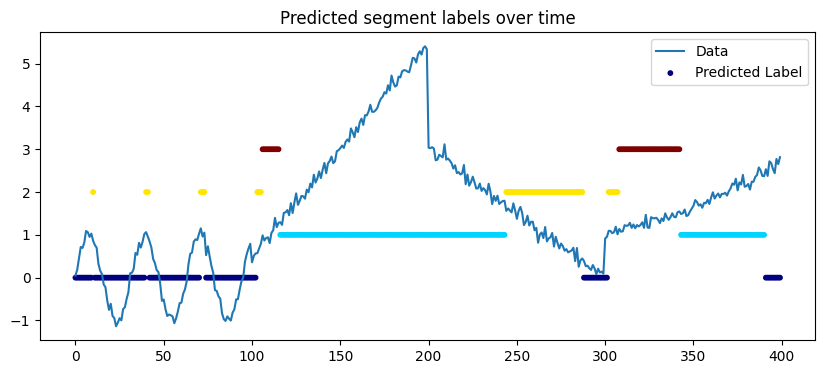

In [13]:
# 예: 학습한 같은 데이터를 그대로 예측해보는 경우
y_pred_probs = model.predict(X)
y_pred = np.argmax(y_pred_probs, axis=1)

# y_pred는 (N,) 크기의 0/1/2/3 라벨
# 이를 시점별로 다시 매핑하려면 슬라이딩에 따라 적절히 합치거나, 
# 윈도우 중앙 인덱스를 기준으로 해서 대입할 수 있음.

pred_labels_full = np.zeros(data_length, dtype=int)
for i in range(len(y_pred)):
    center_idx = i + window_size//2
    if center_idx < data_length:
        pred_labels_full[center_idx] = y_pred[i]

plt.figure(figsize=(10,4))
plt.plot(time, data, label="Data")
plt.scatter(time, pred_labels_full, c=pred_labels_full, cmap='jet', s=10, label="Predicted Label")
plt.legend()
plt.title("Predicted segment labels over time")
plt.show()


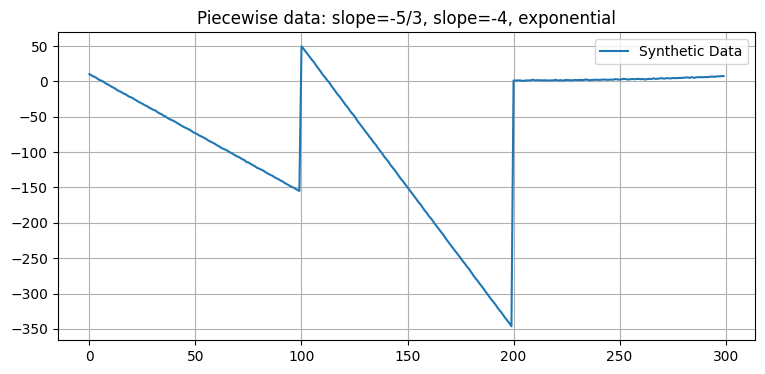

In [14]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# 각 구간별 길이
n_points_per_segment = 100

# x좌표 (0 ~ n_points_per_segment-1)
t = np.arange(n_points_per_segment)

## 구간 1) 기울기 -5/3, 약 -1.6667
slope1 = -5/3
offset1 = 10
segment1 = slope1 * t + offset1 + 0.3*np.random.randn(n_points_per_segment)

## 구간 2) 기울기 -4
slope2 = -4
offset2 = 50
segment2 = slope2 * t + offset2 + 0.3*np.random.randn(n_points_per_segment)

## 구간 3) 지수함수
# 예: y = A * exp(B*x). 여기서는 A=1.0, B=0.02 정도로 예시
A = 1.0
B = 0.02
segment3 = A * np.exp(B*t) + 0.3*np.random.randn(n_points_per_segment)

# 전체 시계열 합치기
data = np.concatenate([segment1, segment2, segment3])
time = np.arange(len(data))

plt.figure(figsize=(9,4))
plt.plot(time, data, label='Synthetic Data')
plt.title("Piecewise data: slope=-5/3, slope=-4, exponential")
plt.grid(True)
plt.legend()
plt.show()


Detected change points: [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 245, 270, 290, 300]


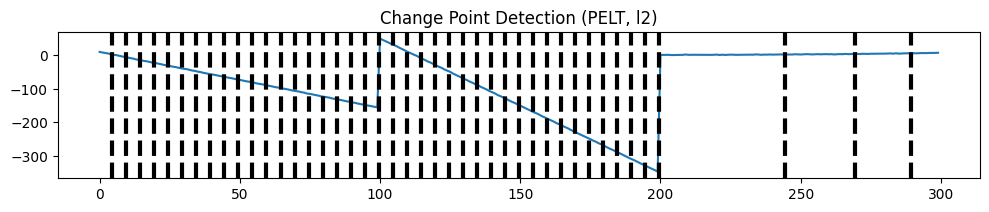

In [15]:
import ruptures as rpt

# 모델: l2 norm (변화가 발생하는 지점의 평균 차이를 기준으로 검출)
algo = rpt.Pelt(model="l2").fit(data)
# 세그먼트 수가 3개라고 (대략) 예상하므로, 변경점 2개 찾기 위해 'min_size'나 'penalty'를 조절 가능
# 혹은 세그먼트 개수를 직접 지정하는 방법도 있음 (Binseg, TopDown 등 사용)

# 여기서는 간단히 penalty(페널티)로 조절해본다
pen = 10  # 데이터 스케일, 노이즈 등에 따라 조절
change_points = algo.predict(pen=pen)
print("Detected change points:", change_points)

# 시각화
rpt.display(data, [], change_points)
plt.title("Change Point Detection (PELT, l2)")
plt.show()


In [16]:
from sklearn.linear_model import LinearRegression

def classify_segment(segment_data):
    x = np.arange(len(segment_data)).reshape(-1, 1)
    y = segment_data

    # (a) 선형 모델 적합
    lin_reg = LinearRegression().fit(x, y)
    y_pred_lin = lin_reg.predict(x)
    mse_lin = np.mean((y - y_pred_lin)**2)

    # (b) 지수 모델 적합 (log(y) = log(A) + B*x 형태)
    if np.all(y > 0):
        y_log = np.log(y)
        lin_reg_exp = LinearRegression().fit(x, y_log)
        y_pred_exp = np.exp(lin_reg_exp.predict(x))
        mse_exp = np.mean((y - y_pred_exp)**2)
    else:
        mse_exp = 1e10  # 지수 피팅 불가능하면 큰 값

    if mse_lin < mse_exp:
        return "linear", mse_lin
    else:
        return "exponential", mse_exp

# change_points 기준으로 구간 나누기
seg_starts = [0] + change_points[:-1]  # ex) [0, 100, 200]
seg_ends = change_points               # ex) [100, 200, 300]

for i, (start, end) in enumerate(zip(seg_starts, seg_ends)):
    seg_data = data[start:end]
    seg_type, mse = classify_segment(seg_data)
    print(f"[Segment {i}] start={start}, end={end} -> {seg_type.upper()}, MSE={mse:.4f}")


[Segment 0] start=0, end=5 -> LINEAR, MSE=0.0360
[Segment 1] start=5, end=10 -> LINEAR, MSE=0.0481
[Segment 2] start=10, end=15 -> LINEAR, MSE=0.0325
[Segment 3] start=15, end=20 -> LINEAR, MSE=0.0259
[Segment 4] start=20, end=25 -> LINEAR, MSE=0.0309
[Segment 5] start=25, end=30 -> LINEAR, MSE=0.0258
[Segment 6] start=30, end=35 -> LINEAR, MSE=0.0970
[Segment 7] start=35, end=40 -> LINEAR, MSE=0.0656
[Segment 8] start=40, end=45 -> LINEAR, MSE=0.0047
[Segment 9] start=45, end=50 -> LINEAR, MSE=0.0798
[Segment 10] start=50, end=55 -> LINEAR, MSE=0.0253
[Segment 11] start=55, end=60 -> LINEAR, MSE=0.0420
[Segment 12] start=60, end=65 -> LINEAR, MSE=0.0433
[Segment 13] start=65, end=70 -> LINEAR, MSE=0.0238
[Segment 14] start=70, end=75 -> LINEAR, MSE=0.1468
[Segment 15] start=75, end=80 -> LINEAR, MSE=0.0225
[Segment 16] start=80, end=85 -> LINEAR, MSE=0.0512
[Segment 17] start=85, end=90 -> LINEAR, MSE=0.0288
[Segment 18] start=90, end=95 -> LINEAR, MSE=0.0209
[Segment 19] start=95, en

잡음이 심한 상황

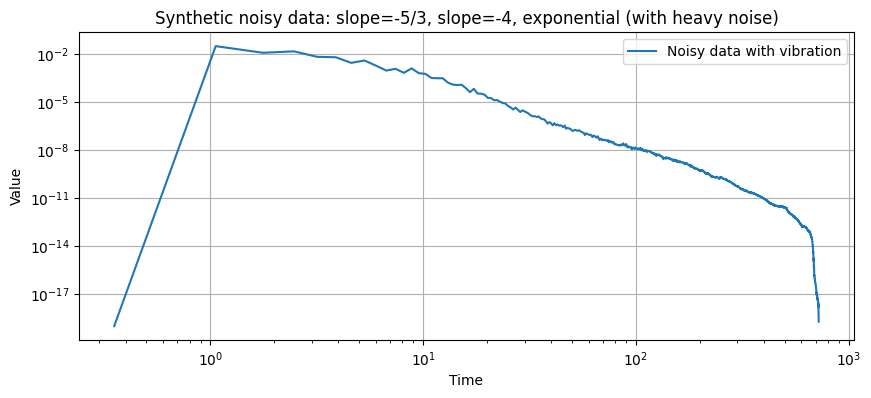

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# 전체 합치기
data = data
time = k

plt.figure(figsize=(10,4))
plt.loglog(time, data, label='Noisy data with vibration')
plt.title("Synthetic noisy data: slope=-5/3, slope=-4, exponential (with heavy noise)")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.legend()
plt.show()


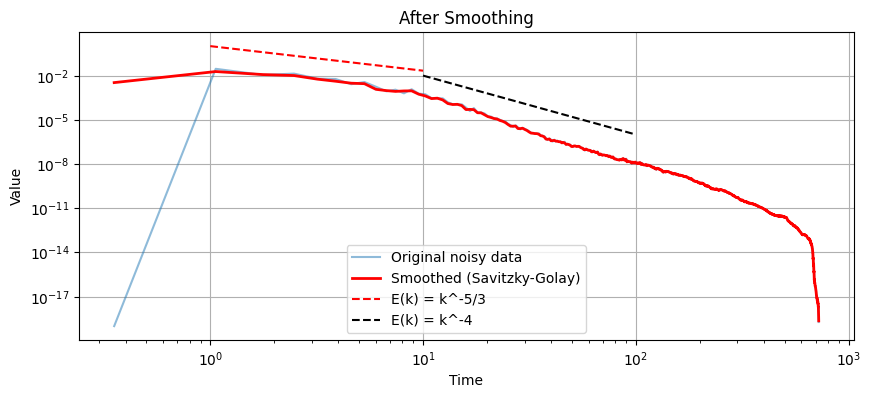

In [59]:
from scipy.signal import savgol_filter
# file = '../proceed_data/proceed_data_v_given/processed_data_u/100_ux_uy_data.txt'
# k, data = get_ek(file)

# # Savitzky-Golay 필터 적용
# # window_length(윈도우 크기)와 polyorder(다항 차수)는 데이터 특성에 맞춰 조정
smoothed_data = savgol_filter(data, window_length=4, polyorder=2)
plt.figure(figsize=(10,4))
plt.loglog(k, data, alpha=0.5, label='Original noisy data')
plt.loglog(k, smoothed_data, 'r', linewidth=2, label='Smoothed (Savitzky-Golay)')
plt.title("After Smoothing")
compared_line()
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


Detected change points: [5, 10, 15, 20, 25, 35, 1024]


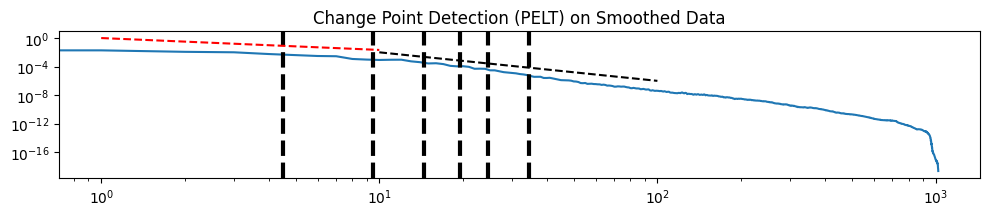

In [84]:
import ruptures as rpt

algo = rpt.Pelt(model="l2").fit(smoothed_data)

# 잡음이 심해 불필요하게 많은 세그먼트가 생길 수 있으므로
# penalty 값을 크게 해서(=세그먼트 개수를 줄이는 방향), 
# 원하는 2개의 변화점(=3개 구간) 정도만 잡아내도록 조정해봅니다.
pen = 1e-9  # 데이터 스케일, 노이즈 양에 따라 조정
change_points = algo.predict(pen=pen)

print("Detected change points:", change_points)

# 시각화
rpt.display(smoothed_data, [], change_points)
plt.xscale('log')
plt.yscale('log')
compared_line()
plt.title("Change Point Detection (PELT) on Smoothed Data")
plt.show()


In [83]:
import numpy as np
from sklearn.linear_model import LinearRegression

def classify_segment(k_array, e_array, log_scale=True):
    """
    k_array: 구간 내 k 값들 (X축)
    e_array: 해당 구간의 에너지 스펙트럼 값들 (Y축)
    log_scale: True이면 log-log 스케일에서 기울기 판단, False이면 일반 스케일 사용
    """
    if log_scale:
        # 로그-로그 변환 (스펙트럼 분석에 적합)
        x = np.log(k_array).reshape(-1, 1)
        y = np.log(e_array)
    else:
        # 일반 선형 분석
        x = k_array.reshape(-1, 1)
        y = e_array

    # (a) 선형 모델 적합
    lin_reg = LinearRegression().fit(x, y)
    y_pred_lin = lin_reg.predict(x)
    mse_lin = np.mean((y - y_pred_lin)**2)
    slope = lin_reg.coef_[0]  # 기울기 저장

    # (b) 지수 모델 적합 (log(E) = log(A) - B * k)
    if np.all(e_array > 0):  # 지수 함수는 양수만 가능
        y_log = np.log(e_array)
        lin_reg_exp = LinearRegression().fit(k_array.reshape(-1, 1), y_log)
        y_pred_exp = np.exp(lin_reg_exp.predict(k_array.reshape(-1, 1)))
        mse_exp = np.mean((e_array - y_pred_exp)**2)
    else:
        mse_exp = 1e10  # 음수 데이터가 있으면 비현실적으로 큰 값 부여

    # 더 작은 MSE를 가진 모델 채택
    if mse_lin < mse_exp:
        return "linear", mse_lin, slope
    else:
        return "exponential", mse_exp, None

# ===========================================
# 세그먼트 분류 및 분석 실행
# ===========================================

seg_starts = [0] + change_points[:-1]
seg_ends = change_points

for i, (start, end) in enumerate(zip(seg_starts, seg_ends)):
    seg_k = k[start:end]  # 해당 구간의 k 값들
    seg_data = data[start:end]  # 해당 구간의 E(k) 값들

    seg_type, mse, slope = classify_segment(seg_k, seg_data, log_scale=True)

    if seg_type == "linear":
        print(f"[Segment {i}] start={start}, end={end} -> linear, slope={slope:.2f}, MSE={mse:.2f}")
    else:
        print(f"[Segment {i}] start={start}, end={end} -> exponential, MSE={mse:.2f}")



[Segment 0] start=0, end=5 -> linear, slope=17.58, MSE=61.65
[Segment 1] start=5, end=10 -> exponential, MSE=0.00
[Segment 2] start=10, end=15 -> exponential, MSE=0.00
[Segment 3] start=15, end=20 -> exponential, MSE=0.00
[Segment 4] start=20, end=25 -> exponential, MSE=0.00
[Segment 5] start=25, end=30 -> exponential, MSE=0.00
[Segment 6] start=30, end=35 -> exponential, MSE=0.00
[Segment 7] start=35, end=40 -> exponential, MSE=0.00
[Segment 8] start=40, end=45 -> exponential, MSE=0.00
[Segment 9] start=45, end=50 -> exponential, MSE=0.00
[Segment 10] start=50, end=55 -> exponential, MSE=0.00
[Segment 11] start=55, end=60 -> exponential, MSE=0.00
[Segment 12] start=60, end=65 -> exponential, MSE=0.00
[Segment 13] start=65, end=70 -> exponential, MSE=0.00
[Segment 14] start=70, end=75 -> exponential, MSE=0.00
[Segment 15] start=75, end=80 -> exponential, MSE=0.00
[Segment 16] start=80, end=85 -> exponential, MSE=0.00
[Segment 17] start=85, end=90 -> exponential, MSE=0.00
[Segment 18] s

===== Fit 결과 =====
k1 = 1.0000, k2 = 0.0844
C1 = 0.0000, C2 = 357.3513
A  = 0.0517,  b  = 0.6304


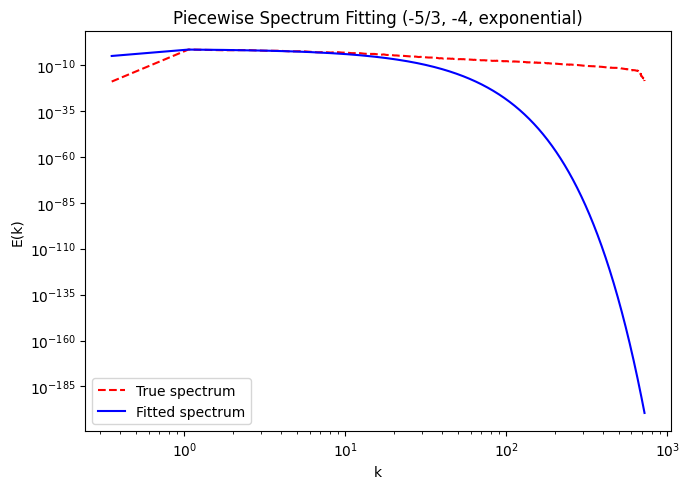

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

###############################################################################
# 1) 예시용 데이터 생성 (실제로는 사용자의 k, E(k) 실측/시뮬레이션 데이터를 사용)
###############################################################################
# 예시: 사용자 데이터 로드
data[0] = 10e-20
k_vals = k
E_noisy = data



###############################################################################
# 2) 피스와이즈 함수 정의 (fit할 대상)
###############################################################################
def piecewise_spectrum(k, k1, k2, C1, C2, A, b):
    """
    k1, k2 : 구간 경계 (k < k1 이면 첫 구간, k1 <= k < k2 이면 둘째 구간, 그 이상은 셋째 구간)
    C1, C2 : 첫째/둘째 구간에서의 파워 스펙트럼 계수
    A, b   : 셋째 구간(지수함수)의 계수
    """
    # 반환할 배열 (k와 동일한 shape)
    val = np.empty_like(k, dtype=float)
    
    for i, ki in enumerate(k):
        if ki < k1:
            # 첫 구간 : ~ k^(-5/3)
            val[i] = C1 * ki**(-5.0/3.0)
        elif ki < k2:
            # 둘째 구간 : ~ k^(-4)
            val[i] = C2 * ki**(-4.0)
        else:
            # 셋째 구간 : ~ exp(-b*k)
            val[i] = A * np.exp(-b * ki)
    
    return val

###############################################################################
# 3) curve_fit을 이용한 최소자승 피팅
###############################################################################
# 초기값 추정 (데이터 상황에 맞춰 적당히 조정)
p0 = [
    1.0,    # k1 초기값
    5.0,    # k2 초기값
    1.0,    # C1
    0.1,    # C2
    1.0,    # A
    1.0     # b
]

# 경계에 대한 bounds (k1 < k2를 보장하도록 설정 예시)
#  - k1, k2는 (0.01, 1e3) 정도로 설정
#  - C1, C2, A 등은 (>0) 가정
#  - b는 (0, 10) 등으로 가정
bounds_lower = [0.01, 0.01, 1e-6, 1e-6, 1e-6, 0.0 ]
bounds_upper = [1e3,  1e3,  1e3,  1e3,  1e3,  10.0]

popt, pcov = curve_fit(piecewise_spectrum,
                       xdata=k_vals,
                       ydata=E_noisy,
                       p0=p0,
                       bounds=(bounds_lower, bounds_upper))

k1_fit, k2_fit, C1_fit, C2_fit, A_fit, b_fit = popt

print("===== Fit 결과 =====")
print(f"k1 = {k1_fit:.4f}, k2 = {k2_fit:.4f}")
print(f"C1 = {C1_fit:.4f}, C2 = {C2_fit:.4f}")
print(f"A  = {A_fit:.4f},  b  = {b_fit:.4f}")

# 피팅 결과 곡선
E_fit = piecewise_spectrum(k_vals, *popt)

###############################################################################
# 4) 시각화
###############################################################################
plt.figure(figsize=(7,5))
plt.loglog(k_vals, E_noisy, 'r--', label='True spectrum')
plt.loglog(k_vals, E_fit, 'b-',  label='Fitted spectrum')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('k')
plt.ylabel('E(k)')
plt.legend()
plt.title("Piecewise Spectrum Fitting (-5/3, -4, exponential)")
plt.tight_layout()
plt.show()


최적 해: k1=1.3162858170614162, k2=556.4282619889333, SSE=2521.6835696129247
구간1: C1 = exp(-24.464) = 2.373e-11, slope=-5/3
구간2: C2 = exp(-0.776) = 4.602e-01, slope=-4
구간3: A  = exp(13.948) = 1.141e+06, b=0.071


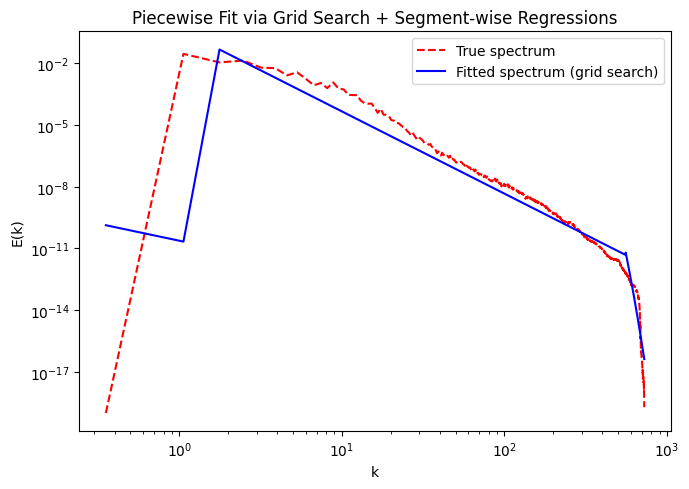

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 로그 변환
logk = np.log(k_vals)
logE = np.log(E_noisy)

def linear_fit_slope_intercept(x, y):
    """간단히 np.polyfit으로 (slope, intercept)를 구하는 함수"""
    # y = m*x + c 피팅
    m, c = np.polyfit(x, y, 1)
    return m, c

def compute_segment_error(x_seg, y_seg, model_func):
    """구간에 대한 SSE 계산"""
    y_pred = model_func(x_seg)
    return np.sum( (y_seg - y_pred)**2 )

best_error = np.inf
best_k1, best_k2 = None, None
best_params = None

# k1_candidates와 k2_candidates를 로그 스케일에서 일정 간격으로
logk_min, logk_max = logk.min(), logk.max()
k1_candidates = np.linspace(logk_min, logk_max, 30)  # 30개
k2_candidates = np.linspace(logk_min, logk_max, 30)  # 30개

for logk1 in k1_candidates:
    for logk2 in k2_candidates:
        if logk2 <= logk1:
            continue  # k2 > k1 이어야 함
        # 실제 k1, k2
        k1 = np.exp(logk1)
        k2 = np.exp(logk2)

        # 세 구간별로 데이터 분할
        idx1 = (k_vals < k1)
        idx2 = (k_vals >= k1) & (k_vals < k2)
        idx3 = (k_vals >= k2)

        # 만약 구간에 데이터가 너무 적다면 skip
        if np.sum(idx1) < 2 or np.sum(idx2) < 2 or np.sum(idx3) < 2:
            continue

        # ------ 구간1: -5/3 피팅 ------
        # log(E) = log(C1) - 5/3 * log(k)
        # --> y = c + m*x 형태
        # 여기서 m = -5/3, c = log(C1). slope는 고정되어 있고 intercept만 찾으면 됨
        x1, y1 = logk[idx1], logE[idx1]
        # slope 고정(-5/3) => c = average( y1 - (-5/3 * x1) )
        slope1 = -5.0/3.0
        c1 = np.mean(y1 - slope1*x1)  # log(C1)
        # SSE 계산
        y1_hat = slope1*x1 + c1
        err1 = np.sum( (y1 - y1_hat)**2 )

        # ------ 구간2: -4 피팅 ------
        x2, y2 = logk[idx2], logE[idx2]
        slope2 = -4.0
        c2 = np.mean(y2 - slope2*x2)  # log(C2)
        y2_hat = slope2*x2 + c2
        err2 = np.sum( (y2 - y2_hat)**2 )

        # ------ 구간3: 지수형 exp(-b*k) ------
        # log(E) = log(A) - b * k  (단, 여기선 k = exp(x)이므로)
        # --> log(E) = log(A) - b * exp(x)
        x3, y3 = logk[idx3], logE[idx3]
        
        # 이건 비선형 피팅이긴 하지만, 구간이 짧다면 간단히 np.polyfit은 못 쓰므로
        # 간단한 least-squares 맞춤을 해볼 수 있음.
        # 예: "b * exp(x)"를 하나의 독립변수로 보고, intercept = log(A)
        X3 = np.column_stack([np.ones_like(x3), np.exp(x3)])  # [1, exp(x)]
        # log(E) = c - d * exp(x) 형태로 보고, c=log(A), d=b
        # => y3 = c - d*X3
        # => y3 + d*X3 = c
        # 이런 식으로 OLS를 해볼 수도 있지만, 아래에선 scipy의 최소자승을 짧게 써봄:
        from functools import partial
        from scipy.optimize import least_squares

        def residual_exp(params, x, y):
            c, d = params  # c=log(A), d=b
            return (y - (c - d*np.exp(x)))
        
        # 초기값 대충
        init = [0.0, 1.0]
        res = least_squares(residual_exp, init, args=(x3,y3))
        c3, d3 = res.x  # c3=log(A), d3=b (단, 부호가 반대이므로 주의)
        err3 = np.sum(res.fun**2)

        total_err = err1 + err2 + err3
        if total_err < best_error:
            best_error = total_err
            best_k1, best_k2 = k1, k2
            best_params = (c1, slope1, c2, slope2, c3, d3)

# 결과 확인
print(f"최적 해: k1={best_k1}, k2={best_k2}, SSE={best_error}")
print(f"구간1: C1 = exp({best_params[0]:.3f}) = {np.exp(best_params[0]):.3e}, slope=-5/3")
print(f"구간2: C2 = exp({best_params[2]:.3f}) = {np.exp(best_params[2]):.3e}, slope=-4")
print(f"구간3: A  = exp({best_params[4]:.3f}) = {np.exp(best_params[4]):.3e}, b={best_params[5]:.3f}")

# 피팅 곡선 그려보기
c1, m1, c2, m2, c3, d3 = best_params

def model_piecewise(k):
    if k < best_k1:
        return np.exp(m1*np.log(k) + c1)
    elif k < best_k2:
        return np.exp(m2*np.log(k) + c2)
    else:
        # exp(-b*k) = exp( c3 - d3*exp(log(k)) )
        return np.exp(c3 - d3*k)

E_fit_grid = np.array([model_piecewise(kk) for kk in k_vals])

plt.figure(figsize=(7,5))
plt.plot(k_vals, E_noisy, 'r--', label='True spectrum')
plt.plot(k_vals, E_fit_grid, 'b-', label='Fitted spectrum (grid search)')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('k')
plt.ylabel('E(k)')
plt.legend()
plt.title("Piecewise Fit via Grid Search + Segment-wise Regressions")
plt.tight_layout()
plt.show()
